<a href="https://colab.research.google.com/github/bharath31793/Fls_ap_dm/blob/master/IT_SALARY_SURVEY_EU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.pandas.set_option("display.max_columns",None)
pd.pandas.set_option("display.max_rows",None)

In [ ]:
!pip install unidecode
from unidecode import unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data_18 = pd.read_csv("/content/IT Salary Survey EU 2018.csv")
data_19 = pd.read_csv("/content/IT Salary Survey EU 2019.csv")
data_20 = pd.read_csv("/content/IT Salary Survey EU  2020.csv")

In [ ]:
data_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           765 non-null    object 
 1   Age                                 672 non-null    float64
 2   Gender                              751 non-null    object 
 3   City                                736 non-null    object 
 4   Position                            737 non-null    object 
 5   Years of experience                 732 non-null    float64
 6   Your level                          743 non-null    object 
 7   Current Salary                      750 non-null    float64
 8   Salary one year ago                 596 non-null    float64
 9   Salary two years ago                463 non-null    float64
 10  Are you getting any Stock Options?  742 non-null    object 
 11  Main language at work               750 non-n

In [ ]:
data_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 23 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Zeitstempel                                                                                           991 non-null    object 
 1   Age                                                                                                   882 non-null    float64
 2   Gender                                                                                                991 non-null    object 
 3   City                                                                                                  991 non-null    object 
 4   Seniority level                                                                                       97

In [ ]:
data_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [ ]:
print('Dataset sizes:\n 2018 : ' , data_18.shape , '\n 2019 : ', data_19.shape, '\n 2020 : ', data_20.shape)

Dataset sizes:
 2018 :  (765, 14) 
 2019 :  (991, 23) 
 2020 :  (1253, 23)


In [ ]:
data_18.rename(columns = {'Years of experience': 'yrs_exp', 'Your level': 'level', 'Current Salary': "salary", 'Salary one year ago': 'sal_1yr_ago', 'Salary two years ago': 'sal_2yr_ago', 'Are you getting any Stock Options?': 'getting_stock',  'Main language at work': 'language', 'Company size': 'comp_size', 'Company type': 'comp_type' }, inplace=True)

In [ ]:
#Lowercase column headers
data_18.columns = map(str.lower, data_18.columns)

In [ ]:
data_18.columns

Index(['timestamp', 'age', 'gender', 'city', 'position', 'yrs_exp', 'level',
       'salary', 'sal_1yr_ago', 'sal_2yr_ago', 'getting_stock', 'language',
       'comp_size', 'comp_type'],
      dtype='object')

In [ ]:
data_19.rename(columns = {'Zeitstempel': 'timestamp','Years of experience': 'yrs_exp', 'Seniority level': 'level','Position (without seniority)': 'position' , 'Are you getting any Stock Options?': 'getting_stock','Your main technology / programming language':'technology',  'Main language at work': 'language', 'Company size': 'comp_size', 'Company type': 'comp_type', 'Yearly brutto salary (without bonus and stocks)': 'br_sal', 'Yearly bonus': 'bonus', 'Yearly stocks': 'stocks', 'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country':'br_sal_1yr_ago', 'Yearly bonus one year ago. Only answer if staying in same country':'bonus_1yr_ago', 'Yearly stocks one year ago. Only answer if staying in same country': 'stocks_1yr_ago', 'Number of vacation days': 'vacation','Number of home office days per month': 'wfh_days_p_mon', 'Company name':'comp_name', 'Сontract duration':'contract', 'Company business sector':'business_sector'  }, inplace=True)

In [ ]:
data_19.columns = map(str.lower, data_19.columns)

In [ ]:
data_19.columns

Index(['timestamp', 'age', 'gender', 'city', 'level', 'position', 'yrs_exp',
       'technology', 'br_sal', 'bonus', 'stocks', 'br_sal_1yr_ago',
       'bonus_1yr_ago', 'stocks_1yr_ago', 'vacation', 'wfh_days_p_mon',
       'language', 'company name ', 'comp_size', 'comp_type', 'contract',
       'business_sector', '0'],
      dtype='object')

In [ ]:
data_20.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [ ]:
data_20.rename(columns = {'Total years of experience': 'yrs_exp','Years of experience in Germany':'yrs_exp_germany', 'Seniority level': 'level','Other technologies/programming languages you use often':'other_technologies','Position ': 'position','Yearly brutto salary (without bonus and stocks) in EUR':'br_sal','Yearly bonus + stocks in EUR':'bonus_and_stocks','Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country':'br_sal_1yr_ago' , 'Annual bonus+stocks one year ago. Only answer if staying in same country':'bonus_and_stocks_1yr_ago','Number of vacation days':'vacation','Employment status':'emp_status','Your main technology / programming language':'technology',  'Main language at work': 'language', 'Company size': 'comp_size', 'Company type': 'comp_type', 'Have you lost your job due to the coronavirus outbreak?':'lost_job_due_to_corona', 'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week':'shorter_week','Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR':'monetory_support','Сontract duration':'contract'  }, inplace=True)

In [ ]:
data_20.columns = map(str.lower, data_20.columns)

In [ ]:
data_20.columns

Index(['timestamp', 'age', 'gender', 'city', 'position', 'yrs_exp',
       'yrs_exp_germany', 'level', 'technology', 'other_technologies',
       'br_sal', 'bonus_and_stocks', 'br_sal_1yr_ago',
       'bonus_and_stocks_1yr_ago', 'vacation', 'emp_status', 'contract',
       'language', 'comp_size', 'comp_type', 'lost_job_due_to_corona',
       'shorter_week', 'monetory_support'],
      dtype='object')

# **data_2019**

In [ ]:
data_19.isnull().sum()

timestamp            0
age                109
gender               0
city                 0
level               15
position             1
yrs_exp              0
technology          14
br_sal               1
bonus              461
stocks             788
br_sal_1yr_ago     388
bonus_1yr_ago      734
stocks_1yr_ago     852
vacation            60
wfh_days_p_mon     352
language             5
company name       734
comp_size           14
comp_type           31
contract            29
business_sector    145
0                  991
dtype: int64

In [ ]:
def clean_col(column):
  col_cleaned = column.str.strip()
  col_cleaned = col_cleaned.str.lower()
  col_cleaned = col_cleaned.apply(lambda x: unidecode(str(x))) #remove non-english characters
  col_cleaned = col_cleaned.str.replace(r'\(.*?\)', '')
  return col_cleaned

In [ ]:
data_19["yrs_exp"].unique()

array([13,  3,  4,  6, 10, 11, 12, 15,  8,  7,  9,  2,  5, 16, 20, 14, 18,
       19,  0, 25,  1, 17, 22, 24, 30, 28])

In [ ]:
data_19["level"].value_counts()

Senior       587
Middle       272
Junior        73
Lead          35
Head           6
Principal      3
Name: level, dtype: int64

In [ ]:
#data_19.groupby(['level','yrs_exp']).size()

In [ ]:
data_19.loc[data_19['yrs_exp'] < 5.0, 'level'] = data_19.loc[data_19['yrs_exp'] < 5.0, 'level'].fillna('junior')
data_19.loc[(data_19['yrs_exp'] >= 5.0) & (data_19['yrs_exp'] <= 15.0), 'level'] = data_19.loc[(data_19['yrs_exp'] >= 5.0) & (data_19['yrs_exp'] <= 15.0), 'level'].fillna('middle')
data_19.loc[data_19['yrs_exp'] > 15, 'level'] = data_19.loc[data_19['yrs_exp'] > 15, 'level'].fillna('senior')

In [ ]:
data_19['level'] = data_19['level'].str.lower()

In [ ]:
data_19['level'].value_counts()

senior       588
middle       284
junior        75
lead          35
head           6
principal      3
Name: level, dtype: int64

In [ ]:
data_19.isnull().sum()

timestamp            0
age                109
gender               0
city                 0
level                0
position             1
yrs_exp              0
technology          14
br_sal               1
bonus              461
stocks             788
br_sal_1yr_ago     388
bonus_1yr_ago      734
stocks_1yr_ago     852
vacation            60
wfh_days_p_mon     352
language             5
company name       734
comp_size           14
comp_type           31
contract            29
business_sector    145
0                  991
dtype: int64

In [ ]:
data_19['gender'].value_counts()

Male      838
Female    153
Name: gender, dtype: int64

In [ ]:
data_19[data_19['br_sal'].isnull()]

timestamp  age gender     city   level           position  \
475  04.12.2019 19:19:26  NaN   Male  Hamburg  junior  Backend Developer   

     yrs_exp technology  br_sal  bonus  stocks  br_sal_1yr_ago  bonus_1yr_ago  \
475       18     Python     NaN    NaN     NaN             NaN            NaN   

     stocks_1yr_ago  vacation  wfh_days_p_mon language company name   \
475             NaN       NaN             NaN  English           NaN   

    comp_size comp_type   contract business_sector   0  
475     1000+   Product  unlimited     Agriculture NaN

In [ ]:
data_19.groupby('level')['age'].mean()

level
head         31.600000
junior       29.000000
lead         32.555556
middle       31.015326
principal    31.500000
senior       33.598837
Name: age, dtype: float64

In [ ]:
data_19.loc[data_19['level'] == 'junior', 'age'] = data_19.loc[data_19['level'] == 'junior', 'age'].fillna(29.0)
data_19.loc[data_19['level'] == 'head', 'age'] = data_19.loc[data_19['level'] == 'head', 'age'].fillna(31.0)
data_19.loc[data_19['level'] == 'lead', 'age'] = data_19.loc[data_19['level'] == 'lead', 'age'].fillna(32.0)
data_19.loc[data_19['level'] == 'middle', 'age'] = data_19.loc[data_19['level'] == 'middle', 'age'].fillna(31.0)
data_19.loc[data_19['level'] == 'principal', 'age'] = data_19.loc[data_19['level'] == 'principal', 'age'].fillna(31.0)
data_19.loc[data_19['level'] == 'senior', 'age'] = data_19.loc[data_19['level'] == 'senior', 'age'].fillna(33.0)

In [ ]:
data_19.isnull().sum()

timestamp            0
age                  0
gender               0
city                 0
level                0
position             1
yrs_exp              0
technology          14
br_sal               1
bonus              461
stocks             788
br_sal_1yr_ago     388
bonus_1yr_ago      734
stocks_1yr_ago     852
vacation            60
wfh_days_p_mon     352
language             5
company name       734
comp_size           14
comp_type           31
contract            29
business_sector    145
0                  991
dtype: int64

In [ ]:
data_19.city.unique()

array(['Berlin', 'Hamburg', 'Frankfurt', 'Munich', 'Cologne',
       'Düsseldorf', 'Wolfsburg', 'MA', 'Leipzig', 'Nuremberg', 'Krakow',
       'Prague', 'Wroclaw', 'Stuttgart', 'London', 'Karlsruhe',
       'Ingolstadt', 'Riga', 'Bern', 'Moscow', 'Darmstadt', 'Dusseldorf',
       'Kyiv', 'Freiburg', 'Amsterdam', 'Vienna', 'Pforzheim', 'Kassel ',
       'Madrid', 'Marburg', 'Warsaw', 'Hannover', 'Paris', 'Milan',
       'Odesa', 'Cork', 'Zug', 'Heidelberg', 'Brussels', 'Bielefeld',
       'Dublin', 'Jyvaskyla', 'Toulouse', 'Dubai', 'Zurich', 'Lingen',
       'Dresden', 'Lugano', 'Walldorf', 'Schleswig-Holstein',
       'Braunschweig', 'Kaiserslautern', 'Eindhoven', 'Saint Petersburg',
       'Eindhoven ', 'Leeuwarden', 'Hilversum', 'Gdańsk', 'Gothenburg',
       'Almere', 'Limassol', 'Stockholm', 'Tampere', 'Bayern',
       'Rotterdam', 'Antwerpen', 'Tallinn', 'Koblenz', 'Würzburg ',
       'Bremen', 'Lausanne', 'Nizhny Novgorod ', 'Saint-Petersburg ',
       'Minsk', 'Utrecht', 'Kiev']

In [ ]:
data_19['city'] = clean_col(data_19['city'])

<ipython-input-25-1b9705d3b710>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  col_cleaned = col_cleaned.str.replace(r'\(.*?\)', '')


In [ ]:
data_19.city.unique()

array(['berlin', 'hamburg', 'frankfurt', 'munich', 'cologne',
       'dusseldorf', 'wolfsburg', 'ma', 'leipzig', 'nuremberg', 'krakow',
       'prague', 'wroclaw', 'stuttgart', 'london', 'karlsruhe',
       'ingolstadt', 'riga', 'bern', 'moscow', 'darmstadt', 'kyiv',
       'freiburg', 'amsterdam', 'vienna', 'pforzheim', 'kassel', 'madrid',
       'marburg', 'warsaw', 'hannover', 'paris', 'milan', 'odesa', 'cork',
       'zug', 'heidelberg', 'brussels', 'bielefeld', 'dublin',
       'jyvaskyla', 'toulouse', 'dubai', 'zurich', 'lingen', 'dresden',
       'lugano', 'walldorf', 'schleswig-holstein', 'braunschweig',
       'kaiserslautern', 'eindhoven', 'saint petersburg', 'leeuwarden',
       'hilversum', 'gdansk', 'gothenburg', 'almere', 'limassol',
       'stockholm', 'tampere', 'bayern', 'rotterdam', 'antwerpen',
       'tallinn', 'koblenz', 'wurzburg', 'bremen', 'lausanne',
       'nizhny novgorod', 'saint-petersburg', 'minsk', 'utrecht', 'kiev'],
      dtype=object)

In [ ]:
#data_19.city.value_counts()
#data_19.position.value_counts()

In [ ]:
data_19.position.unique()

array(['Fullstack Developer', 'Backend Developer', 'Mobile Developer',
       'Embedded Developer', 'Machine Learning Engineer', 'Manager',
       'DevOps', 'Designer (UI, UX)', 'Frontend Developer',
       'Data Scientist', 'Data Engineer', 'QA', 'Software Architect',
       'Business Analyst', 'Localization', 'Support',
       'System Administrator', 'Product Manager', 'SAP Consultant', 'SRE',
       'Software Engineer', 'CTO (CEO, CFO)', 'Database Developer (DBA)',
       'Desktop/Unity3D Developer', 'Recruiter ', 'Researcher', nan,
       'Cloud Platform Engineer', 'Lawyer ', 'IT Security',
       'Sales Engineer', 'Mainframe', 'Network Engineer', 'NLP Engineer',
       'Head of AI', 'Head of Engineering', 'Tech Lead',
       'Crypto Developer', 'Modelling Specialist', 'RPA developer',
       'Platform Engineer', 'UX Researcher', 'Game Developer',
       'Backend Developer & Team Lead', 'support', 'DevOps Manager',
       'Solution Architect', 'Scrum Master', 'Data Analyst', 'Deskt

In [ ]:
data_19['position'].fillna("backend developer", inplace=True)

In [ ]:
uiux = data_19[data_19['position'].str.contains('|'.join(['UI']), case=False)]
data_19.loc[uiux.index, 'position'] = 'ui/ux designer'

In [ ]:
data_19['position'] = clean_col(data_19['position'])

<ipython-input-25-1b9705d3b710>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  col_cleaned = col_cleaned.str.replace(r'\(.*?\)', '')


In [ ]:
qas = data_19[data_19['position'].str.contains('|'.join(['qa','quality']), case=False)]
data_19.loc[qas.index, 'position'] = 'qa engineer'

In [ ]:
data_19['position'] = data_19['position'].str.replace('backend developer & team lead','backend developer')

In [ ]:
data_19['position'] = data_19['position'].str.replace('desktop/unity3d developer','desktop developer')

In [ ]:
desktop = data_19[data_19['position'].str.contains('|'.join(['desktop']), case=False)]
data_19.loc[desktop.index, 'position'] ='desktop developer'

In [ ]:
manager = data_19[data_19['position'].str.contains('|'.join(['manager']), case=False)]
data_19.loc[manager.index, 'position'] ='manager'

In [ ]:
data_19.position.unique()

array(['fullstack developer', 'backend developer', 'mobile developer',
       'embedded developer', 'machine learning engineer', 'manager',
       'devops', 'ui/ux designer', 'frontend developer', 'data scientist',
       'data engineer', 'qa engineer', 'software architect',
       'business analyst', 'localization', 'support',
       'system administrator', 'sap consultant', 'sre',
       'software engineer', 'cto ', 'database developer ',
       'desktop developer', 'researcher', 'cloud platform engineer',
       'lawyer', 'it security', 'sales engineer', 'mainframe',
       'network engineer', 'nlp engineer', 'head of ai',
       'head of engineering', 'tech lead', 'crypto developer',
       'modelling specialist', 'rpa developer', 'platform engineer',
       'ux researcher', 'game developer', 'solution architect',
       'scrum master', 'data analyst', 'security engineer'], dtype=object)

In [ ]:
data_19.isnull().sum()

timestamp            0
age                  0
gender               0
city                 0
level                0
position             0
yrs_exp              0
technology          14
br_sal               1
bonus              461
stocks             788
br_sal_1yr_ago     388
bonus_1yr_ago      734
stocks_1yr_ago     852
vacation            60
wfh_days_p_mon     352
language             5
company name       734
comp_size           14
comp_type           31
contract            29
business_sector    145
0                  991
dtype: int64

In [ ]:
data_19['comp_size'].value_counts()

100-1000    366
1000+       346
50-100      132
10-50       105
up to 10     28
Name: comp_size, dtype: int64

In [ ]:
data_19['comp_size'] = data_19['comp_size'].fillna('100-1000')

In [ ]:
data_19['comp_type'].value_counts()

Product                 619
Startup                 181
Consulting / Agency     117
Bodyshop / Outsource     30
University                6
Bank                      6
Outsource                 1
Name: comp_type, dtype: int64

In [ ]:
data_19['comp_type'] = clean_col(data_19['comp_type'])

<ipython-input-25-1b9705d3b710>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  col_cleaned = col_cleaned.str.replace(r'\(.*?\)', '')


In [ ]:
consultants = data_19[data_19['comp_type'].str.contains('|'.join(['consulting']), case=False)]
data_19.loc[consultants.index, 'comp_type'] = 'consultancy'

In [ ]:
outsource = data_19[data_19['comp_type'].str.contains('|'.join(['outsource']), case=False)]
data_19.loc[outsource.index, 'comp_type'] = 'outsource'

In [ ]:
data_19['comp_type'] = data_19['comp_type'].str.replace('nan','product')

In [ ]:
data_19['comp_type'].value_counts()

product        650
startup        181
consultancy    117
outsource       31
university       6
bank             6
Name: comp_type, dtype: int64

In [ ]:
data_19['language'].value_counts()

English            753
Deutsch            182
Russian             37
French               5
Italian              2
Polish               2
English+Deutsch      1
Spanish              1
Dutch                1
Polish+English       1
Ukrainian            1
Name: language, dtype: int64

In [ ]:
data_19['language'] = clean_col(data_19['language'])

<ipython-input-25-1b9705d3b710>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  col_cleaned = col_cleaned.str.replace(r'\(.*?\)', '')


In [ ]:
data_19['language'] = data_19['language'].str.replace('english\+deutsch','deutsch')

<ipython-input-63-113ae287a0b1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_19['language'] = data_19['language'].str.replace('english\+deutsch','deutsch')


In [ ]:
#data_19['language'] = data_19['language'].str.replace('English+Deutsch','Deutsch')
data_19['language'] = data_19['language'].str.replace('polish\+english','polish')


<ipython-input-64-77f63a42d9c4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_19['language'] = data_19['language'].str.replace('polish\+english','polish')


In [ ]:
data_19['language'] = data_19['language'].str.replace('nan','english')

## **technology imputation**

In [ ]:
data_19.groupby(['position','technology']).size

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f5f65385d20>>

In [ ]:
data_19[data_19['technology'].isnull()]

timestamp   age  gender       city   level  \
56   02.12.2019 12:07:58  31.0  Female         ma  senior   
93   02.12.2019 13:30:29  31.0  Female     berlin  middle   
94   02.12.2019 13:33:23  27.0    Male     berlin  middle   
138  02.12.2019 15:19:47  34.0    Male     munich  senior   
168  02.12.2019 16:05:20  29.0    Male     berlin  middle   
227  02.12.2019 19:59:25  25.0  Female     munich  junior   
246  02.12.2019 21:11:52  33.0    Male     munich  senior   
250  02.12.2019 21:45:06  27.0  Female  nuremberg  middle   
310  03.12.2019 11:09:14  33.0    Male  frankfurt  senior   
524  05.12.2019 07:41:29  30.0  Female     berlin  junior   
584  05.12.2019 18:33:01  35.0    Male     munich  senior   
678  08.12.2019 23:06:40  36.0    Male     berlin  middle   
835  13.12.2019 14:30:35  26.0    Male     berlin  junior   
950  25.12.2019 01:26:40  44.0    Male     munich  senior   

                position  yrs_exp technology    br_sal    bonus  stocks  \
56        ui/ux designer       10        NaN   61000.0      NaN     NaN   
93               manager        3        NaN   60000.0      NaN     NaN   
94               manager        2        NaN   52000.0      NaN     NaN   
138          qa engineer       12        NaN   64000.0   5000.0     NaN   
168               devops       10        NaN   70000.0      NaN     NaN   
227              manager        1        NaN   43200.0  10100.0     NaN   
246    backend developer        7        NaN   63500.0   7000.0     1.0   
250     business analyst        5        NaN   42000.0      NaN     NaN   
310               lawyer        7        NaN  170000.0  20000.0     NaN   
524          qa engineer        1        NaN   34000.0   2000.0     NaN   
584  database developer        14        NaN   68000.0      0.0     NaN   
678          qa engineer        6        NaN   50000.0      NaN     NaN   
835        ux researcher        2        NaN   48000.0      1.0     1.0   
950               devops       22        NaN  101000.0   9000.0     NaN   

     br_sal_1yr_ago  bonus_1yr_ago  stocks_1yr_ago  vacation  wfh_days_p_mon  \
56          56000.0            NaN             NaN      30.0             6.0   
93              NaN            NaN             NaN      26.0             NaN   
94          36000.0            NaN             NaN      27.0             2.0   
138         62000.0         5000.0             NaN      30.0             4.0   
168             NaN            NaN             NaN      25.0             NaN   
227             NaN            NaN             NaN      26.0             NaN   
246             NaN            NaN             NaN       NaN             NaN   
250             NaN            NaN             NaN      25.0             1.0   
310        160000.0            NaN            10.0       NaN             0.0   
524             NaN            NaN             NaN      30.0             NaN   
584             NaN            NaN             NaN      30.0             NaN   
678         50000.0            NaN             NaN      30.0             3.0   
835         44000.0            1.0             1.0      21.0             4.0   
950         99000.0         9000.0             NaN      30.0             1.0   

    language      company name  comp_size    comp_type          contract  \
56   deutsch                NaN     10-50      product         unlimited   
93   english                NaN    50-100      startup               NaN   
94   english                NaN  100-1000      product         unlimited   
138  deutsch                NaN     1000+      product         unlimited   
168  english                NaN  100-1000      startup         unlimited   
227  deutsch                NaN     1000+  consultancy         unlimited   
246  english                NaN     1000+      product         unlimited   
250  english                NaN     1000+      product         unlimited   
310  english                NaN  100-1000  consultancy         unlimited   
524  english

In [ ]:
xyz=data_19[data_19['position']== 'it administrator']
xyz['technology'].value_counts()

Series([], Name: technology, dtype: int64)

In [ ]:
data_19['position'].unique()

array(['fullstack developer', 'backend developer', 'mobile developer',
       'embedded developer', 'machine learning engineer', 'manager',
       'devops', 'ui/ux designer', 'frontend developer', 'data scientist',
       'data engineer', 'qa engineer', 'software architect',
       'business analyst', 'localization', 'support',
       'system administrator', 'sap consultant', 'sre',
       'software engineer', 'cto ', 'database developer ',
       'desktop developer', 'researcher', 'cloud platform engineer',
       'lawyer', 'it security', 'sales engineer', 'mainframe',
       'network engineer', 'nlp engineer', 'head of ai',
       'head of engineering', 'tech lead', 'crypto developer',
       'modelling specialist', 'rpa developer', 'platform engineer',
       'ux researcher', 'game developer', 'solution architect',
       'scrum master', 'data analyst', 'security engineer'], dtype=object)

In [ ]:
data_19.loc[data_19['position'] == 'ui/ux designer', 'technology'] = data_19.loc[data_19['position'] == 'ui/ux designer', 'technology'].fillna('Figma')
data_19.loc[data_19['position'] == 'manager', 'technology'] = data_19.loc[data_19['position'] == 'manager', 'technology'].fillna('Java')
data_19.loc[data_19['position'] == 'devops', 'technology'] = data_19.loc[data_19['position'] == 'devops', 'technology'].fillna('AWS')
data_19.loc[data_19['position'] == 'qa engineer', 'technology'] = data_19.loc[data_19['position'] == 'qa engineer', 'technology'].fillna('Java')
data_19.loc[data_19['position'] == 'backend developer', 'technology'] = data_19.loc[data_19['position'] == 'backend developer', 'technology'].fillna('Java')
data_19.loc[data_19['position'] == 'business analyst', 'technology'] = data_19.loc[data_19['position'] == 'business analyst', 'technology'].fillna('Python')
data_19.loc[data_19['position'] == 'lawyer', 'technology'] = data_19.loc[data_19['position'] == 'lawyer', 'technology'].fillna('non tech')
data_19.loc[data_19['position'] == 'database developer ', 'technology'] = data_19.loc[data_19['position'] == 'database developer ', 'technology'].fillna('sql')
data_19.loc[data_19['position'] == 'ux researcher', 'technology'] = data_19.loc[data_19['position'] == 'ux researcher', 'technology'].fillna('javascript')

In [ ]:
#data_19.loc[data_19['position'] == 'ux researcher', 'technology'] = data_19.loc[data_19['position'] == 'ux researcher', 'technology'].fillna('javascript')

In [ ]:
data_19['technology'].unique()

array(['PHP', 'Python', 'Kotlin', 'C/C++', 'Java', 'Not Relevant',
       'Swift', 'Javascript / Typescript', 'Go', 'AWS', 'Kubernetes',
       'Ruby', '.NET', 'Scala', 'Clojure', 'Figma', 'Yaml',
       'Linux-Stack, Networking', 'Azure', 'Elixir', 'Multiple',
       'Objective-C', 'Microsoft, Vmware', 'Google Cloud', 'SAP / ABAP',
       'SQL', 'R', 'non tech', 'SAS', 'sql', 'Powershell', 'Rust',
       'Solidity', 'ASM', 'Cobol', 'Perl', 'Cisco', 'Hadoop', 'Erlang',
       'javascript', 'Unity', 'HR', 'K8S', 'ABAP', 'PostgreSQL',
       'Openstack'], dtype=object)

In [ ]:
data_19['technology'] = clean_col(data_19['technology'])

<ipython-input-25-1b9705d3b710>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  col_cleaned = col_cleaned.str.replace(r'\(.*?\)', '')


In [ ]:
data_19['technology'].unique()

array(['php', 'python', 'kotlin', 'c/c++', 'java', 'not relevant',
       'swift', 'javascript / typescript', 'go', 'aws', 'kubernetes',
       'ruby', '.net', 'scala', 'clojure', 'figma', 'yaml',
       'linux-stack, networking', 'azure', 'elixir', 'multiple',
       'objective-c', 'microsoft, vmware', 'google cloud', 'sap / abap',
       'sql', 'r', 'non tech', 'sas', 'powershell', 'rust', 'solidity',
       'asm', 'cobol', 'perl', 'cisco', 'hadoop', 'erlang', 'javascript',
       'unity', 'hr', 'k8s', 'abap', 'postgresql', 'openstack'],
      dtype=object)

In [ ]:
k8s = data_19[data_19['technology'].str.contains('|'.join(['kubernetes','k8s']), case=False)]
data_19.loc[k8s.index, 'technology'] = 'kubernetes'

## **delaing with salary**

In [ ]:
data_19.isnull().sum()

timestamp            0
age                  0
gender               0
city                 0
level                0
position             0
yrs_exp              0
technology           0
br_sal               1
bonus              461
stocks             788
br_sal_1yr_ago     388
bonus_1yr_ago      734
stocks_1yr_ago     852
vacation            60
wfh_days_p_mon     352
language             0
company name       734
comp_size            0
comp_type            0
contract            29
business_sector    145
0                  991
dtype: int64

In [ ]:
data_19['bonus'].fillna(0, inplace = True)

In [ ]:
data_19['stocks'].fillna(0, inplace = True)

In [ ]:
data_19 = data_19.dropna(subset=['br_sal'])

In [ ]:
data_19['salary']=data_19[['br_sal','bonus','stocks']].sum(axis=1)

<ipython-input-80-ab45286f4d78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_19['salary']=data_19[['br_sal','bonus','stocks']].sum(axis=1)


In [ ]:
data_19['sal_1yr_ago'] = data_19[['br_sal_1yr_ago','bonus_1yr_ago', 'stocks_1yr_ago']].fillna(0).sum(axis=1)

<ipython-input-81-5cff7235d590>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_19['sal_1yr_ago'] = data_19[['br_sal_1yr_ago','bonus_1yr_ago', 'stocks_1yr_ago']].fillna(0).sum(axis=1)


In [ ]:
#data_19[data_19['sal_1yr_ago'].isnull()]

In [ ]:
data_19['sal_1yr_ago'].replace(0, np.nan, inplace=True)

<ipython-input-83-496505a283ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_19['sal_1yr_ago'].replace(0, np.nan, inplace=True)


In [ ]:
data_19['per_increase'] = ((data_19['salary'] - data_19['sal_1yr_ago']) / data_19['sal_1yr_ago']) * 100
#data_19['per_increase'].head()

<ipython-input-84-fa73283ca31d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_19['per_increase'] = ((data_19['salary'] - data_19['sal_1yr_ago']) / data_19['sal_1yr_ago']) * 100


In [ ]:
fig = px.box(data_19, x='level', y='salary', title='Box Plot: Level vs Salary')
fig.show()

In [ ]:
data_19.groupby(['level'])['salary'].mean()

level
head         297333.333333
junior        48719.837838
lead         119342.000000
middle        66740.257077
principal    197000.000000
senior        86049.034541
Name: salary, dtype: float64

In [ ]:
data_19.groupby(['level'])['per_increase'].mean()

level
head            26.632228
junior       69819.418624
lead            15.838941
middle          16.645149
principal       92.500000
senior         269.560295
Name: per_increase, dtype: float64

In [ ]:
#data_19['sal_1yr_ago'].unique()

In [ ]:
fig = px.box(data_19, x='level', y='per_increase', title='Box Plot: Level vs Salary')
fig.show()

In [ ]:
data_19['per_increase'].max()
#data_19['per_increase'].nlargest(2).iloc[1]

1733266.6666666667

In [ ]:
data_19=data_19[data_19['per_increase']!= 1733266.6666666667]

In [ ]:
data_19= data_19[data_19['per_increase']!= 99728.05507745266]

In [ ]:
data_19= data_19[data_19['per_increase']!= 11900.0]

In [ ]:
from scipy import stats

z_scores = np.abs(stats.zscore(data_19['per_increase']))

threshold = 3

# Create a boolean mask to identify outlier rows
outlier_mask = z_scores > threshold

# Remove outlier rows from the DataFrame
data_19 = data_19[~outlier_mask]

In [ ]:
data_19.groupby(['level'])['salary'].mean()

level
head         297333.333333
junior        48517.597222
lead         119342.000000
middle        66740.257077
principal    197000.000000
senior        86096.818075
Name: salary, dtype: float64

In [ ]:
data_19.groupby(['level'])['per_increase'].mean()

level
head         26.632228
junior       13.860824
lead         15.838941
middle       16.645149
principal    92.500000
senior       13.882930
Name: per_increase, dtype: float64

In [ ]:
#data_19[data_19['level']== 'principal']

In [ ]:
def sal1yr_ago (salary, percent_inc):
  x= salary/(1+(percent_inc/100))
  return x


In [ ]:
junior19 = round(sal1yr_ago(48517.597222,13.860824))
middle19 = round(sal1yr_ago(66740.257077,16.645149))
senior19 = round(sal1yr_ago(86096.818075,13.882930))
lead19 = round(sal1yr_ago(119342.000000,15.838941))

In [ ]:
data_19.loc[data_19['level'] == 'junior', 'sal_1yr_ago'] = data_19.loc[data_19['level'] == 'junior', 'sal_1yr_ago'].fillna(junior19)
data_19.loc[data_19['level'] == 'middle', 'sal_1yr_ago'] = data_19.loc[data_19['level'] == 'middle', 'sal_1yr_ago'].fillna(middle19)
data_19.loc[data_19['level'] == 'senior', 'sal_1yr_ago'] = data_19.loc[data_19['level'] == 'senior', 'sal_1yr_ago'].fillna(senior19)
data_19.loc[data_19['level'] == 'lead', 'sal_1yr_ago'] = data_19.loc[data_19['level'] == 'lead', 'sal_1yr_ago'].fillna(lead19)

In [ ]:
data_19[data_19['sal_1yr_ago'].isnull()]

timestamp   age gender    city      level           position  \
116  02.12.2019 14:29:11  31.0   Male  berlin       head               cto    
386  04.12.2019 00:04:40  31.0   Male  berlin       head               cto    
598  05.12.2019 22:11:37  31.0   Male  munich  principal  backend developer   
643  06.12.2019 22:25:34  32.0   Male  berlin       head     data scientist   

     yrs_exp technology    br_sal    bonus    stocks  br_sal_1yr_ago  \
116       12       java  210000.0      0.0    1000.0             NaN   
386       14      c/c++   32000.0      0.0  350000.0             NaN   
598       11       java  115000.0  26000.0   65000.0             NaN   
643       10     python  130000.0  35000.0   80000.0             NaN   

     bonus_1yr_ago  stocks_1yr_ago  vacation  wfh_days_p_mon language  \
116            NaN             NaN      32.0             5.0  english   
386            NaN             NaN      20.0             NaN  english   
598            NaN             NaN      28.0             NaN  english   
643            NaN             NaN      30.0             NaN  english   

    company name  comp_size comp_type   contract business_sector   0  \
116           NaN     1000+   product  unlimited        Сommerce NaN   
386           NaN     10-50   startup  unlimited             NaN NaN   
598           NaN     1000+   product        NaN             NaN NaN   
643           NaN    50-100   startup        NaN        Сommerce NaN   

       salary  sal_1yr_ago  per_increase  
116  211000.0          NaN           NaN  
386  382000.0          NaN           NaN  
598  206000.0          NaN           NaN  
643  245000.0          NaN           NaN

In [ ]:
average_percentage_difference = data_19['per_increase'].mean()
average_percentage_difference

15.04350107594125

In [ ]:
head19 = round(sal1yr_ago(297333.333333,15.04350107594125))
principal19 = round(sal1yr_ago(197000.000000,15.04350107594125))

In [ ]:
data_19.loc[data_19['level'] == 'head', 'sal_1yr_ago'] = data_19.loc[data_19['level'] == 'head', 'sal_1yr_ago'].fillna(head19)
data_19.loc[data_19['level'] == 'principal', 'sal_1yr_ago'] = data_19.loc[data_19['level'] == 'principal', 'sal_1yr_ago'].fillna(principal19)

In [ ]:
data_19['date_time'] = pd.to_datetime(data_19['timestamp'])
data_19['year'] =data_19['date_time'].dt.year
data_19=data_19.drop(columns = ['date_time'])

In [ ]:
data_19.isnull().sum()

timestamp            0
age                  0
gender               0
city                 0
level                0
position             0
yrs_exp              0
technology           0
br_sal               0
bonus                0
stocks               0
br_sal_1yr_ago     386
bonus_1yr_ago      732
stocks_1yr_ago     850
vacation            59
wfh_days_p_mon     349
language             0
company name       730
comp_size            0
comp_type            0
contract            29
business_sector    145
0                  987
salary               0
sal_1yr_ago          0
per_increase       379
year                 0
dtype: int64

# **data_20**

In [ ]:
data_20.isnull().sum()

timestamp                     0
age                          27
gender                       10
city                          0
position                      6
yrs_exp                      16
yrs_exp_germany              32
level                        12
technology                  127
other_technologies          157
br_sal                        0
bonus_and_stocks            424
br_sal_1yr_ago              368
bonus_and_stocks_1yr_ago    639
vacation                     68
emp_status                   17
contract                     29
language                     16
comp_size                    18
comp_type                    25
lost_job_due_to_corona       20
shorter_week                880
monetory_support            791
dtype: int64

In [ ]:
data_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 1253 non-null   object 
 1   age                       1226 non-null   float64
 2   gender                    1243 non-null   object 
 3   city                      1253 non-null   object 
 4   position                  1247 non-null   object 
 5   yrs_exp                   1237 non-null   object 
 6   yrs_exp_germany           1221 non-null   object 
 7   level                     1241 non-null   object 
 8   technology                1126 non-null   object 
 9   other_technologies        1096 non-null   object 
 10  br_sal                    1253 non-null   float64
 11  bonus_and_stocks          829 non-null    object 
 12  br_sal_1yr_ago            885 non-null    float64
 13  bonus_and_stocks_1yr_ago  614 non-null    object 
 14  vacation

In [ ]:
data_20["yrs_exp"].unique()

array(['5', '7', '12', '4', '17', '6', '8', '15', '2', '25', nan, '14',
       '11', '18', '13', '30', '10', '3', '40', '26', '23', '9', '19',
       '20', '5.5', '22', '16', '0.8', '1', '1.5', '6.5', '21', '7.5',
       '2.5', '28', '29', '1,5', '24', '0', '4.5', '27',
       '1 (as QA Engineer) / 11 in total', '2,5', '15, thereof 8 as CTO',
       '31', '6 (not as a data scientist, but as a lab scientist)', '383',
       '3.5', 'less than year'], dtype=object)

In [ ]:
data_20['yrs_exp'] = data_20['yrs_exp'].str.replace('1 \(as QA Engineer\) / 11 in total','11')

<ipython-input-110-8636d332fda2>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
#data_20.yrs_exp.value_counts()

In [ ]:
data_20['yrs_exp'] = data_20['yrs_exp'].str.replace('2,5','7')

In [ ]:
data_20['yrs_exp'] = data_20['yrs_exp'].str.replace('15, thereof 8 as CTO','15')

In [ ]:
data_20['yrs_exp'] = data_20['yrs_exp'].str.replace('1,5','6')

In [ ]:
data_20['yrs_exp'] = data_20['yrs_exp'].str.replace('6 \(not as a data scientist, but as a lab scientist\)','6')

<ipython-input-115-964ac7e53ae0>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
data_20['yrs_exp'] = data_20['yrs_exp'].str.replace('383','14')

In [ ]:
data_20['yrs_exp'] = data_20['yrs_exp'].str.replace('less than year','1')

In [ ]:
data_20['yrs_exp']=data_20['yrs_exp'].astype(float)

In [ ]:
mean_value= round(data_20['yrs_exp'].mean(),1)
#mean_value
data_20["yrs_exp"]=data_20['yrs_exp'].fillna(mean_value)

In [ ]:
data_20['yrs_exp']=data_20['yrs_exp'].astype(int)

In [ ]:
data_20.isnull().sum()

timestamp                     0
age                          27
gender                       10
city                          0
position                      6
yrs_exp                       0
yrs_exp_germany              32
level                        12
technology                  127
other_technologies          157
br_sal                        0
bonus_and_stocks            424
br_sal_1yr_ago              368
bonus_and_stocks_1yr_ago    639
vacation                     68
emp_status                   17
contract                     29
language                     16
comp_size                    18
comp_type                    25
lost_job_due_to_corona       20
shorter_week                880
monetory_support            791
dtype: int64

In [ ]:
data_20['level'].unique()

array(['Senior', 'Lead', 'Junior', 'Middle', 'Head', nan, 'No level',
       'VP', 'Manager', 'Work Center Manager', 'CTO', 'No level ',
       'Director', 'Key', 'C-level executive manager', 'Principal',
       'intern', 'Student', 'no idea, there are no ranges in the firm ',
       'C-Level', 'Working Student', 'Entry level', 'Intern', 'student',
       'Self employed'], dtype=object)

In [ ]:
data_20['level'].value_counts()

Senior                                       565
Middle                                       366
Lead                                         166
Junior                                        79
Head                                          44
Principal                                      3
student                                        1
Intern                                         1
Entry level                                    1
Working Student                                1
C-Level                                        1
no idea, there are no ranges in the firm       1
Student                                        1
intern                                         1
Key                                            1
C-level executive manager                      1
Director                                       1
No level                                       1
CTO                                            1
Work Center Manager                            1
Manager             

In [ ]:
data_20['level'] = data_20['level'].str.lower().str.strip()

In [ ]:
data_20['level'].unique()

array(['senior', 'lead', 'junior', 'middle', 'head', nan, 'no level',
       'vp', 'manager', 'work center manager', 'cto', 'director', 'key',
       'c-level executive manager', 'principal', 'intern', 'student',
       'no idea, there are no ranges in the firm', 'c-level',
       'working student', 'entry level', 'self employed'], dtype=object)

In [ ]:
data_20['level'].value_counts()

senior                                      565
middle                                      366
lead                                        166
junior                                       79
head                                         44
principal                                     3
no level                                      2
student                                       2
intern                                        2
entry level                                   1
working student                               1
c-level                                       1
no idea, there are no ranges in the firm      1
director                                      1
c-level executive manager                     1
key                                           1
cto                                           1
work center manager                           1
manager                                       1
vp                                            1
self employed                           

In [ ]:
data_20['level'] = data_20['level'].str.replace('c-level executive manager','manager')

In [ ]:
data_20['level'] = data_20['level'].str.replace('work center manager','manager')

In [ ]:
data_20['level'] = data_20['level'].str.replace('c-level','manager')

In [ ]:
data_20['level'] = data_20['level'].str.replace('no idea, there are no ranges in the firm','no level')

In [ ]:
data_20['level'] = data_20['level'].str.replace('key','head')

In [ ]:
data_20['level'] = data_20['level'].str.replace('entry level','junior')

In [ ]:
data_20['level'] = data_20['level'].str.replace('working student','student')

In [ ]:
#data_20.groupby(['level','yrs_exp']).size()

In [ ]:
data_20.loc[data_20['yrs_exp'] < 5.0, 'level'] = data_20.loc[data_20['yrs_exp'] < 5.0, 'level'].fillna('junior')

In [ ]:
data_20.loc[(data_20['yrs_exp'] >= 5.0) & (data_20['yrs_exp'] <= 15.0), 'level'] = data_20.loc[(data_20['yrs_exp'] >= 5.0) & (data_20['yrs_exp'] <= 15.0), 'level'].fillna('middle')

In [ ]:
data_20.loc[data_20['yrs_exp'] > 15, 'level'] = data_20.loc[data_20['yrs_exp'] > 15, 'level'].fillna('senior')

In [ ]:
data_20['level'] = data_20['level'].str.replace('no level','middle')

In [ ]:
data_20.groupby('level')['age'].mean()

level
cto              32.000000
director         33.000000
head             36.522727
intern           25.500000
junior           28.585366
lead             34.777778
manager          35.250000
middle           30.284153
principal        35.000000
self employed    45.000000
senior           33.575540
student          24.333333
vp               40.000000
Name: age, dtype: float64

In [ ]:
data_20[data_20['age'].isnull()]

timestamp  age  gender        city            position  \
11    24/11/2020 11:18:16  NaN    Male      Berlin   Software Engineer   
12    24/11/2020 11:18:22  NaN     NaN      Berlin   Software Engineer   
28    24/11/2020 11:25:35  NaN    Male      Berlin              DevOps   
55    24/11/2020 11:33:08  NaN    Male      Berlin   Software Engineer   
113   24/11/2020 11:56:25  NaN    Male      Berlin         QA Engineer   
300   24/11/2020 15:47:19  NaN    Male      Berlin       Data Engineer   
330   24/11/2020 17:29:51  NaN     NaN      Munich      Data Scientist   
340   24/11/2020 17:40:38  NaN    Male     Hamburg    Support Engineer   
365   24/11/2020 18:31:25  NaN    Male      Berlin   Software Engineer   
374   24/11/2020 18:48:30  NaN    Male  Karlsruhe    Backend Developer   
418   24/11/2020 20:26:20  NaN    Male      Munich   Software Engineer   
473   25/11/2020 03:27:34  NaN     NaN      Berlin                 NaN   
529   25/11/2020 10:58:13  NaN    Male      Berlin   Software Engineer   
530   25/11/2020 11:03:17  NaN    Male     Leipzig  Frontend Developer   
708   25/11/2020 22:18:59  NaN    Male   Frankfurt   Software Engineer   
726   26/11/2020 04:26:30  NaN    Male      Berlin              DevOps   
829   27/11/2020 12:20:51  NaN    Male      Berlin       data engineer   
832   27/11/2020 12:33:03  NaN    Male     Hamburg   Software Engineer   
848   27/11/2020 14:34:16  NaN  Female      Berlin      Data Scientist   
904   29/11/2020 12:27:03  NaN    Male      Berlin   Software Engineer   
961   30/11/2020 13:50:56  NaN    Male      Berlin      Data Scientist   
1039  01/12/2020 18:09:57  NaN    Male      Berlin   Backend Developer   
1063  02/12/2020 21:39:34  NaN    Male      Munich  Frontend Developer   
1148  11/12/2020 22:36:22  NaN     NaN   Frankfurt   Software Engineer   
1180  20/12/2020 00:30:53  NaN     NaN      Berlin                 NaN   
1181  20/12/2020 00:31:23  NaN     NaN      Berlin                 NaN   
1231  08/01/2021 12:52:08  NaN     NaN      Munich                 NaN   

      yrs_exp yrs_exp_germany   level  technology  \
11         25              11  senior         C++   
12          8             NaN    lead         PHP   
28         14               5  senior         NaN   
55          8               1  senior         PHP   
113         6               6  middle  Javascript   
300         7             1.5  middle         SQL   
330         2               2  middle     Python    
340         8               2  senior         NaN   
365         9               1    lead        Java   
374         8               8    lead      Python   
418         4               3  middle        Java   
473         8             NaN  middle         NaN   
529        15             NaN  senior        Java   
530         8               6  middle  JavaScript   
708        18               1  senior         NaN   
726        10               5  senior         NaN   
829        11               1  middle      python   
832        12              12  senior        Java   
848         1               8  junior      Python   
904        10              10  senior        .net   
961         4               4    head      python   
1039       15               6  middle      Elixir   
1063        5               3    lead  javascript   
1148       10              10  senior      Python   
1180        8             NaN  middle         NaN   
1181        8             NaN  middle         NaN   
1231        8             NaN  middle         NaN   

                                     other_technologies        br_sal  \
11                                   Python, C/C++, SQL  1.000000e+05   
12                                                  NaN  9.000000e+04   
28                  Python, Go, AWS, Kubernetes, Docker  6.700000e+04   
55                                                  NaN  7.500000e+04   
113                        Javascript / Typescript, AWS  5.000000e+04   
300                P

In [ ]:
data_20.loc[data_20['level'] == 'junior', 'age'] = data_20.loc[data_20['level'] == 'junior', 'age'].fillna(28.0)
data_20.loc[data_20['level'] == 'senior', 'age'] = data_20.loc[data_20['level'] == 'senior', 'age'].fillna(33.0)
data_20.loc[data_20['level'] == 'middle', 'age'] = data_20.loc[data_20['level'] == 'middle', 'age'].fillna(30.0)
data_20.loc[data_20['level'] == 'lead', 'age'] = data_20.loc[data_20['level'] == 'lead', 'age'].fillna(34.0)
data_20.loc[data_20['level'] == 'head', 'age'] = data_20.loc[data_20['level'] == 'head', 'age'].fillna(36.0)

In [ ]:
data_20.isnull().sum()

timestamp                     0
age                           0
gender                       10
city                          0
position                      6
yrs_exp                       0
yrs_exp_germany              32
level                         0
technology                  127
other_technologies          157
br_sal                        0
bonus_and_stocks            424
br_sal_1yr_ago              368
bonus_and_stocks_1yr_ago    639
vacation                     68
emp_status                   17
contract                     29
language                     16
comp_size                    18
comp_type                    25
lost_job_due_to_corona       20
shorter_week                880
monetory_support            791
dtype: int64

In [ ]:
data_20['gender'].unique()

array(['Male', 'Female', nan, 'Diverse'], dtype=object)

In [ ]:
data_20['gender'] = data_20['gender'].fillna('Male')

In [ ]:
data_20.city.unique()

array(['Munich', 'Berlin', 'Hamburg', 'Wolfsburg', 'Stuttgart',
       'Schleswig-Holstein', 'London', 'Konstanz area', 'Frankfurt',
       'Cologne', 'Kempten', 'Münster', 'Erlangen', 'Vienna', 'Moldova',
       'Rosenheim', 'Mannheim ', 'Boeblingen', 'Düsseldorf', 'Ingolstadt',
       'Nürnberg', 'Ansbach', 'Leipzig', 'Mannheim', 'Tuttlingen', 'Bonn',
       'Moscow', 'Koblenz', 'Warsaw', 'Heidelberg', 'Karlsruhe', 'Köln',
       'Aachen', 'Karlsruhe ', 'Samara', 'Riga, Latvia', 'Dusseldorf',
       'Zurich', 'Helsinki', 'Würzburg', 'Kiev', 'Den Haag', 'Amsterdam',
       'Cracovia', 'Tallinn', 'Prague', 'Utrecht', 'Stockholm',
       'Braunschweig ', 'Dresden', 'Kyiv', 'Stuttgart ', 'Malta',
       'Lübeck', 'Nuremberg ', 'Bodensee', 'Milan', 'Salzburg', 'Rome',
       'Wroclaw', 'Cupertino', 'Paris', 'Dublin ', 'Paderborn',
       'Konstanz', 'Ulm', 'Düsseldorf ', 'Barcelona', 'Bölingen',
       'Tampere (Finland)', 'Hannover', 'Bucharest', 'Siegen', 'Minsk',
       'Nuremberg', 'M

In [ ]:
data_20['city'] = clean_col(data_20['city'])

<ipython-input-25-1b9705d3b710>:5: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
data_20['city'] = data_20['city'].str.replace('prefer not to say','berlin')

In [ ]:
data_20.isnull().sum()

timestamp                     0
age                           0
gender                        0
city                          0
position                      6
yrs_exp                       0
yrs_exp_germany              32
level                         0
technology                  127
other_technologies          157
br_sal                        0
bonus_and_stocks            424
br_sal_1yr_ago              368
bonus_and_stocks_1yr_ago    639
vacation                     68
emp_status                   17
contract                     29
language                     16
comp_size                    18
comp_type                    25
lost_job_due_to_corona       20
shorter_week                880
monetory_support            791
dtype: int64

## **position**

In [ ]:
data_20['position'].fillna("backend developer", inplace=True)

In [ ]:
#data_20['position'] = data_20['position'].str.replace('nan','backend developer')

In [ ]:
data_20['position'] = clean_col(data_20['position'])

<ipython-input-25-1b9705d3b710>:5: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
managers = data_20[data_20['position'].str.contains('|'.join(['manager','managet','management']), case=False)]
data_20.loc[managers.index, 'position'] = 'manager'

In [ ]:
consultant = data_20[data_20['position'].str.contains('|'.join(['consultant','consulting']), case=False)]
data_20.loc[consultant.index, 'position'] = 'consultant'

In [ ]:
recruiter = data_20[data_20['position'].str.contains('|'.join(['recruiting','recruiter']), case=False)]
data_20.loc[recruiter.index, 'position'] = 'recruiter'

In [ ]:
fullstack = data_20[data_20['position'].str.contains('|'.join(['full']), case=False)]
data_20.loc[fullstack.index, 'position'] = 'fullstack developer'

In [ ]:
de = data_20[data_20['position'].str.contains('|'.join(['data engineer','databengineer']), case=False)]
data_20.loc[de.index, 'position'] = 'data engineer'

In [ ]:
sd = data_20[data_20['position'].str.contains('|'.join(['c/c\+\+/java developer','software developer']), case=False)]
data_20.loc[sd.index, 'position'] = 'software developer'

In [ ]:
analyst = data_20[data_20['position'].str.contains('|'.join(['researcher/ consumer insights analyst','dana analyst','data analyst','analyst']), case=False)]
data_20.loc[analyst.index, 'position'] = 'business analyst'

In [ ]:
lead = data_20[data_20['position'].str.contains('|'.join(['lead']), case=False)]
data_20.loc[lead.index, 'position'] = 'tech lead'

In [ ]:
sa = data_20[data_20['position'].str.contains('|'.join(['system administrator','systemadministrator']), case=False)]
data_20.loc[sa.index, 'position'] = 'system administrator'

In [ ]:
embedded = data_20[data_20['position'].str.contains('|'.join(['embedded']), case=False)]
data_20.loc[embedded.index, 'position'] = 'embedded developer'

In [ ]:
security= data_20[data_20['position'].str.contains('|'.join(['security']), case=False)]
data_20.loc[security.index, 'position'] = 'security'

In [ ]:
architect= data_20[data_20['position'].str.contains('|'.join(['architect','software architekt']), case=False)]
data_20.loc[architect.index, 'position'] = 'software architect'

In [ ]:
sm= data_20[data_20['position'].str.contains('|'.join(['agile','scrum master']), case=False)]
data_20.loc[sm.index, 'position'] = 'scrum master'

In [ ]:
data_20['position'] = data_20['position'].str.replace('beikoch','backend developer')

In [ ]:
data_20['position'] = data_20['position'].str.replace('dba','database administrator')

In [ ]:
data_20['position'] = data_20['position'].str.replace('designer ','designer')

In [ ]:
data_20['position'] = data_20['position'].str.replace('hiwi','backend developer')

In [ ]:
data_20['position'] = data_20['position'].str.replace('working student ','working student')

In [ ]:
data_20['position'] = data_20['position'].str.replace('testautomation ','test automation')

In [ ]:
data_20['position'].nunique()

60

In [ ]:
pqr=data_20['position'].unique()

In [ ]:
pd.Series(pqr).sort_values()

13            analytics engineer
1              backend developer
28                        banker
31              business analyst
43        chief research officer
29                cloud engineer
57        computational linguist
49    computer vision researcher
18                    consultant
39                           cto
4                  data engineer
11                data scientist
33        database administrator
5                       designer
3                         devops
41       director of engineering
46            embedded developer
23             firmware engineer
2             frontend developer
19           fullstack developer
26              graphic designer
12             hardware engineer
51                    head of bi
48           head of engineering
50                    head of it
27                 ios developer
42                 it spezialist
14         localization producer
6                        manager
17                   ml engineer
7         

In [ ]:
#data_19['position'].unique()

In [ ]:
data_20['position'].unique()

array(['software engineer', 'backend developer', 'frontend developer',
       'devops', 'data engineer', 'designer', 'manager',
       'mobile developer', 'software architect', 'tech lead',
       'qa engineer', 'data scientist', 'hardware engineer',
       'analytics engineer', 'localization producer',
       'reporting engineer', 'scrum master', 'ml engineer', 'consultant',
       'fullstack developer', 'system administrator', 'network engineer',
       'vp engineering', 'firmware engineer', 'software developer',
       'network administrator', 'graphic designer', 'ios developer',
       'banker', 'cloud engineer', 'stuttgart', 'business analyst',
       'security', 'database administrator', 'support engineer',
       'recruiter', 'testautomation', 'sap developer', 'sre', 'cto',
       'software tester', 'director of engineering', 'it spezialist',
       'chief research officer', 'presales engineer', 'researcher',
       'embedded developer', 'working student', 'head of engineering',

In [ ]:
data_20['language'].value_counts()

English               1020
German                 186
Russian                 12
Italian                  3
Spanish                  3
English and German       2
Polish                   2
Русский                  2
Czech                    2
50/50                    1
Deuglisch                1
French                   1
both                     1
Russian, English         1
Name: language, dtype: int64

In [ ]:
data_20['language'] = data_20['language'].fillna('English')

In [ ]:
data_20['language'] = clean_col(data_20['language'])

<ipython-input-25-1b9705d3b710>:5: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
data_20['language'] = data_20['language'].str.replace('russian, english','russian')
data_20['language'] = data_20['language'].str.replace('english and german','german')
data_20['language'] = data_20['language'].str.replace('50/50','english')
data_20['language'] = data_20['language'].str.replace('both','english')


In [ ]:
data_20['comp_size'].value_counts()

1000+       448
101-1000    405
11-50       174
51-100      147
up to 10     61
Name: comp_size, dtype: int64

In [ ]:
data_20['comp_size'] = data_20['comp_size'].fillna('1000+')

In [ ]:
data_20['comp_type'].unique()

array(['Product', 'Startup', 'Consulting / Agency', nan, 'Media',
       'Personal Ltd', 'Cloud', 'Behörde', 'Construction',
       'Big commercial', 'Outsorce', 'Bank ', 'Fintech', 'Automotive',
       'Bank', 'IT Department of established business',
       'Telecommunications', 'E-commerce', 'Systemhaus', 'University',
       'consumer goods', 'IT-Outsourcing', 'Game Company', 'Financial ',
       'Corporation', 'Publishing and Technology', 'Market Research ',
       'e-commerce', 'SaaS', 'Publisher', 'Energy ', 'Enterprise',
       'Bloody enterprise', 'service', 'Concern', 'Utilities',
       'Insurance', 'Science Institute ', 'Research institute', 'Retail',
       'Ecommerce', 'E-Commerce', 'Semiconductor', 'Automotive ',
       'Institute', 'Finance', 'Handel ', 'Consulting and Product',
       'Education', 'Pharma',
       'Full-time position in Education, part-time position in at a data startup',
       'Corporation ', 'Transport & Logistics', 'Biergarten ',
       'Non-tech re

In [ ]:
data_20['comp_type'] = data_20['comp_type'].fillna('Product')

In [ ]:
data_20['comp_type'] = clean_col(data_20['comp_type'])

<ipython-input-25-1b9705d3b710>:5: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
data_20['comp_type'] = data_20['comp_type'].str.replace('full-time position in education, part-time position in at a data startup','startup')

In [ ]:
outsource = data_20[data_20['comp_type'].str.contains('|'.join(['outsourcing','outsorce','outsourse']), case=False)]
data_20.loc[outsource.index, 'comp_type'] = 'outsource'

In [ ]:
consultants = data_20[data_20['comp_type'].str.contains('|'.join(['consulting']), case=False)]
data_20.loc[consultants.index, 'comp_type'] = 'consultancy'

## **technology imputation**

In [ ]:
data_20['technology'].isnull().sum()

127

In [ ]:
xyz=data_20[data_20['position']== 'it administrator']
xyz['technology'].value_counts()

Series([], Name: technology, dtype: int64)

In [ ]:
data_20.loc[data_20['position'] == 'designer', 'technology'] = data_20.loc[data_20['position'] == 'designer', 'technology'].fillna('Figma')
data_20.loc[data_20['position'] == 'manager', 'technology'] = data_20.loc[data_20['position'] == 'manager', 'technology'].fillna('Java')
data_20.loc[data_20['position'] == 'devops', 'technology'] = data_20.loc[data_20['position'] == 'devops', 'technology'].fillna('Kubernetes')
data_20.loc[data_20['position'] == 'qa engineer', 'technology'] = data_20.loc[data_20['position'] == 'qa engineer', 'technology'].fillna('Java')
data_20.loc[data_20['position'] == 'backend developer', 'technology'] = data_20.loc[data_20['position'] == 'backend developer', 'technology'].fillna('Java')
data_20.loc[data_20['position'] == 'data scientist', 'technology'] = data_20.loc[data_20['position'] == 'data scientist', 'technology'].fillna('Python')
data_20.loc[data_20['position'] == 'localization producer', 'technology'] = data_20.loc[data_20['position'] == 'localization producer', 'technology'].fillna('non tech')
data_20.loc[data_20['position'] == 'system administrator', 'technology'] = data_20.loc[data_20['position'] == 'system administrator', 'technology'].fillna('Powershell')
data_20.loc[data_20['position'] == 'scrum master', 'technology'] = data_20.loc[data_20['position'] == 'scrum master', 'technology'].fillna('Agile')
data_20.loc[data_20['position'] == 'software engineer', 'technology'] = data_20.loc[data_20['position'] == 'software engineer', 'technology'].fillna('Java')
data_20.loc[data_20['position'] == 'graphic designer', 'technology'] = data_20.loc[data_20['position'] == 'graphic designer', 'technology'].fillna('Figma')
data_20.loc[data_20['position'] == 'recruiter', 'technology'] = data_20.loc[data_20['position'] == 'recruiter', 'technology'].fillna('JS')
data_20.loc[data_20['position'] == 'support engineer', 'technology'] = data_20.loc[data_20['position'] == 'support engineer', 'technology'].fillna('PHP')
data_20.loc[data_20['position'] == 'data engineer', 'technology'] = data_20.loc[data_20['position'] == 'data engineer', 'technology'].fillna('Python')
data_20.loc[data_20['position'] == 'software architect', 'technology'] = data_20.loc[data_20['position'] == 'software architect', 'technology'].fillna('Go')
data_20.loc[data_20['position'] == 'tech lead', 'technology'] = data_20.loc[data_20['position'] == 'tech lead', 'technology'].fillna('Java')
data_20.loc[data_20['position'] == 'business analyst', 'technology'] = data_20.loc[data_20['position'] == 'business analyst', 'technology'].fillna('SQL')
data_20.loc[data_20['position'] == 'ml engineer', 'technology'] = data_20.loc[data_20['position'] == 'ml engineer', 'technology'].fillna('Python')
data_20.loc[data_20['position'] == 'mobile developer', 'technology'] = data_20.loc[data_20['position'] == 'mobile developer', 'technology'].fillna('Swift')
data_20.loc[data_20['position'] == 'hardware engineer', 'technology'] = data_20.loc[data_20['position'] == 'hardware engineer', 'technology'].fillna('Hardware')
data_20.loc[data_20['position'] == 'head of it', 'technology'] = data_20.loc[data_20['position'] == 'head of it', 'technology'].fillna('Python')
data_20.loc[data_20['position'] == 'cto', 'technology'] = data_20.loc[data_20['position'] == 'cto', 'technology'].fillna('JAVA')
data_20.loc[data_20['position'] == 'head of engineering', 'technology'] = data_20.loc[data_20['position'] == 'head of engineering', 'technology'].fillna('Java')
data_20.loc[data_20['position'] == 'security', 'technology'] = data_20.loc[data_20['position'] == 'security', 'technology'].fillna('Networking')
data_20.loc[data_20['position'] == 'banker', 'technology'] = data_20.loc[data_20['position'] == 'banker', 'technology'].fillna('non tech')
data_20.loc[data_20['position'] == 'rentner', 'technology'] = data_20.loc[data_20['position'] == 'rentner', 'technology'].fillna('non tech')

In [ ]:
#data_20.loc[data_20['position'] == 'rentner', 'technology'] = data_20.loc[data_20['position'] == 'rentner', 'technology'].fillna('non tech')

In [ ]:
data_20['technology'].nunique()

259

In [ ]:
data_20['technology'] = clean_col(data_20['technology'])

<ipython-input-25-1b9705d3b710>:5: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
notrelevant = data_20[data_20['technology'].str.contains('|'.join(['none','nothing','-']), case=False)]
data_20.loc[notrelevant.index, 'technology'] = 'not relevant'

In [ ]:
k8s = data_20[data_20['technology'].str.contains('|'.join(['k8s','kubrrnetes']), case=False)]
data_20.loc[k8s.index, 'technology'] = 'kubernetes'

In [ ]:
node = data_20[data_20['technology'].str.contains('|'.join(['nodsjs','node','node.js']), case=False)]
data_20.loc[node.index, 'technology'] = 'node.js'

In [ ]:
python = data_20[data_20['technology'].str.contains('|'.join(['pyrhon','pythin','node.js']), case=False)]
data_20.loc[python.index, 'technology'] = 'python'

In [ ]:
data_20['technology'] = clean_col(data_20['technology'])

<ipython-input-25-1b9705d3b710>:5: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
#asd=data_20['technology'].unique()

In [ ]:
#pd.Series(asd).sort_values()

## **dealing with salary**

In [ ]:
data_20['bonus_and_stocks'].fillna(0, inplace = True)

In [ ]:
data_20['salary']=data_20[['br_sal','bonus_and_stocks']].sum(axis=1)

<ipython-input-202-a6777047482e>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
data_20['sal_1yr_ago'] = data_20[['br_sal_1yr_ago','bonus_and_stocks_1yr_ago']].fillna(0).sum(axis=1)

<ipython-input-203-fb9da14ef088>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
data_20['sal_1yr_ago'].replace(0, np.nan, inplace=True)

In [ ]:
data_20['per_increase'] = ((data_20['salary'] - data_20['sal_1yr_ago']) / data_20['sal_1yr_ago']) * 100

In [ ]:
fig = px.box(data_20, x='level', y='salary', title='Box Plot: Level vs Salary')
fig.show()

In [ ]:
data_20['salary'].max()

99999999999.0

In [ ]:
data_20= data_20[data_20['salary']!= 99999999999.0]

In [ ]:
fig = px.box(data_20, x='level', y='salary', title='Box Plot: Level vs Salary')
fig.show()

In [ ]:
data_20['salary'].max()

500000000.0

In [ ]:
data_20= data_20[data_20['salary']!= 500000000.0]

In [ ]:
data_20['salary'].max()

850000.0

In [ ]:
data_20= data_20[data_20['salary']!= 850000.0]

In [ ]:
data_20['salary'].max()

300000.0

In [ ]:
data_20= data_20[data_20['salary']!= 300000.0]

In [ ]:
data_20.groupby(['level'])['salary'].mean()

level
cto              200000.000000
director         100000.000000
head              99788.888889
intern            27500.000000
junior            47771.257683
lead              88722.710843
manager          105550.000000
middle            58736.570667
principal         95000.000000
self employed    200000.000000
senior            74200.893805
student           14240.000000
vp               100000.000000
Name: salary, dtype: float64

In [ ]:
data_20.groupby(['level'])['per_increase'].mean()

level
cto                    NaN
director         19.047619
head             21.023358
intern           16.666667
junior           15.781271
lead              9.591438
manager          23.863564
middle           13.282421
principal        12.549020
self employed     0.000000
senior            9.243324
student           0.000000
vp                     NaN
Name: per_increase, dtype: float64

In [ ]:
from scipy import stats

z_scores = np.abs(stats.zscore(data_20['per_increase']))

threshold = 3

# Create a boolean mask to identify outlier rows
outlier_mask = z_scores > threshold

# Remove outlier rows from the DataFrame
data_20 = data_20[~outlier_mask]

In [ ]:
#data_20[data_20['per_increase'].isnull()]

In [ ]:
junior20 = round(sal1yr_ago(47771.257683,15.781271))
middle20 = round(sal1yr_ago(58736.570667,13.282421))
senior20 = round(sal1yr_ago(74200.893805,9.243324))
lead20 = round(sal1yr_ago(88722.710843,9.591438))
head20 = round(sal1yr_ago(99788.888889,21.023358))

In [ ]:
data_20.loc[data_20['level'] == 'junior', 'sal_1yr_ago'] = data_20.loc[data_20['level'] == 'junior', 'sal_1yr_ago'].fillna(junior20)
data_20.loc[data_20['level'] == 'middle', 'sal_1yr_ago'] = data_20.loc[data_20['level'] == 'middle', 'sal_1yr_ago'].fillna(middle20)
data_20.loc[data_20['level'] == 'senior', 'sal_1yr_ago'] = data_20.loc[data_20['level'] == 'senior', 'sal_1yr_ago'].fillna(senior20)
data_20.loc[data_20['level'] == 'lead', 'sal_1yr_ago'] = data_20.loc[data_20['level'] == 'lead', 'sal_1yr_ago'].fillna(lead20)
data_20.loc[data_20['level'] == 'head', 'sal_1yr_ago'] = data_20.loc[data_20['level'] == 'head', 'sal_1yr_ago'].fillna(head20)

In [ ]:
#data_20.isnull().sum()

In [ ]:
data_20[data_20['sal_1yr_ago'].isnull()]

timestamp   age  gender       city           position  \
166   24/11/2020 12:21:45  40.0    Male     berlin     vp engineering   
183   24/11/2020 12:36:13  36.0    Male  rosenheim            manager   
441   24/11/2020 21:36:24  32.0    Male     berlin                cto   
601   25/11/2020 14:08:39  29.0  Female     berlin     data scientist   
959   30/11/2020 13:26:02  24.0    Male     berlin  backend developer   
1209  28/12/2020 22:24:47  24.0  Female     munich  software engineer   

      yrs_exp yrs_exp_germany    level                     technology  \
166        10               7       vp                             js   
183        12             0.5  manager                         python   
441        10               4      cto                           java   
601         0               0   intern                         python   
959         1               1  student                         python   
1209        1  less than year  student  python, database technologies   

                          other_technologies    br_sal bonus_and_stocks  \
166             Javascript / Typescript, AWS  100000.0                0   
183               R, SQL, AWS, Azure, Docker   89200.0            17800   
441                            Python, C/C++  200000.0           200000   
601   Python, SQL, AWS, Google Cloud, Docker   20000.0            20000   
959       Python, Javascript / Typescript, R   14400.0               Na   
1209          Python, Java / Scala, SQL, AWS   16320.0            16320   

      br_sal_1yr_ago bonus_and_stocks_1yr_ago vacation          emp_status  \
166              NaN                      NaN       24  Full-time employee   
183              NaN                      NaN      NaN  Full-time employee   
441              NaN                      NaN       28  Full-time employee   
601              NaN                      NaN       25  Full-time employee   
959              NaN                      NaN       24     Working Student   
1209             NaN                      NaN       10  Part-time employee   

                contract language comp_size     comp_type  \
166   Unlimited contract  english    51-100       product   
183   Unlimited contract  english     1000+  construction   
441   Unlimited contract  english  101-1000       product   
601   Temporary contract  english     1000+       product   
959   Temporary contract   german  up to 10       startup   
1209  Unlimited contract  english     11-50       startup   

     lost_job_due_to_corona  shorter_week monetory_support    salary  \
166                      No           NaN              NaN  100000.0   
183                      No           NaN              NaN   89200.0   
441                     Yes           NaN              NaN  200000.0   
601                      No           NaN              NaN   20000.0   
959                      No           0.0               No   14400.0   
1209                     No           NaN              NaN   16320.0   

      sal_1yr_ago  per_increase  
166           NaN           NaN  
183           NaN           NaN  
441           NaN           NaN  
601           NaN           NaN  
959           NaN           NaN  
1209          NaN           NaN

In [ ]:
average_percentage_difference = data_20['per_increase'].mean()
average_percentage_difference

11.246996154956157

In [ ]:
cto20 = round(sal1yr_ago(200000.000000,11.246996154956157))
manager20 = round(sal1yr_ago(105550.000000,11.246996154956157))
intern20 = round(sal1yr_ago(27500.000000,11.246996154956157))
student20 = round(sal1yr_ago(14240.000000,11.246996154956157))
vp20 = round(sal1yr_ago(100000.000000,11.246996154956157))

In [ ]:
data_20.loc[data_20['level'] == 'student', 'sal_1yr_ago'] = data_20.loc[data_20['level'] == 'student', 'sal_1yr_ago'].fillna(student20)
data_20.loc[data_20['level'] == 'intern', 'sal_1yr_ago'] = data_20.loc[data_20['level'] == 'intern', 'sal_1yr_ago'].fillna(intern20)
data_20.loc[data_20['level'] == 'cto', 'sal_1yr_ago'] = data_20.loc[data_20['level'] == 'cto', 'sal_1yr_ago'].fillna(cto20)
data_20.loc[data_20['level'] == 'manager', 'sal_1yr_ago'] = data_20.loc[data_20['level'] == 'manager', 'sal_1yr_ago'].fillna(manager20)
data_20.loc[data_20['level'] == 'vp', 'sal_1yr_ago'] = data_20.loc[data_20['level'] == 'vp', 'sal_1yr_ago'].fillna(vp20)

In [ ]:
data_20['date_time'] = pd.to_datetime(data_20['timestamp'])
data_20['year'] =data_20['date_time'].dt.year
data_20=data_20.drop(columns = ['date_time'])

In [ ]:
data_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 0 to 1252
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 1249 non-null   object 
 1   age                       1249 non-null   float64
 2   gender                    1249 non-null   object 
 3   city                      1249 non-null   object 
 4   position                  1249 non-null   object 
 5   yrs_exp                   1249 non-null   int64  
 6   yrs_exp_germany           1218 non-null   object 
 7   level                     1249 non-null   object 
 8   technology                1249 non-null   object 
 9   other_technologies        1094 non-null   object 
 10  br_sal                    1249 non-null   float64
 11  bonus_and_stocks          1249 non-null   object 
 12  br_sal_1yr_ago            883 non-null    float64
 13  bonus_and_stocks_1yr_ago  612 non-null    object 
 14  vacation

In [ ]:
#data_19[data_19['position']=='software developer']

In [ ]:
data_19.columns

Index(['timestamp', 'age', 'gender', 'city', 'level', 'position', 'yrs_exp',
       'technology', 'br_sal', 'bonus', 'stocks', 'br_sal_1yr_ago',
       'bonus_1yr_ago', 'stocks_1yr_ago', 'vacation', 'wfh_days_p_mon',
       'language', 'company name ', 'comp_size', 'comp_type', 'contract',
       'business_sector', '0', 'salary', 'sal_1yr_ago', 'per_increase',
       'year'],
      dtype='object')

In [ ]:
data20 = data_20.drop(columns=['per_increase','monetory_support','shorter_week','lost_job_due_to_corona','contract','emp_status','vacation','bonus_and_stocks_1yr_ago','br_sal_1yr_ago','bonus_and_stocks','br_sal','other_technologies','yrs_exp_germany'])

In [ ]:
data19 = data_19.drop(columns=['br_sal', 'bonus', 'stocks', 'br_sal_1yr_ago',
       'bonus_1yr_ago', 'stocks_1yr_ago', 'vacation', 'wfh_days_p_mon',
       'company name ','contract',
       'business_sector', '0','per_increase'])

# **Combining 19 and 20 datasets**

In [ ]:
data_concat = pd.concat([data19, data20])
data_concat = data_concat.reset_index(drop=True)

In [ ]:
data_concat.isnull().sum()

timestamp      0
age            0
gender         0
city           0
level          0
position       0
yrs_exp        0
technology     0
language       0
comp_size      0
comp_type      0
salary         0
sal_1yr_ago    0
year           0
dtype: int64

# **data_18**

In [ ]:
data_18.isnull().sum()

timestamp          0
age               93
gender            14
city              29
position          28
yrs_exp           33
level             22
salary            15
sal_1yr_ago      169
sal_2yr_ago      302
getting_stock     23
language          15
comp_size         15
comp_type         35
dtype: int64

In [ ]:
data_18['level'].unique()

array(['Senior', 'Middle', 'Junior', nan], dtype=object)

In [ ]:
data_18[data_18['level'].isnull()]


timestamp   age gender       city                position  \
173  14/12/2018 16:59:45  32.0      M     Berlin         product manager   
228  14/12/2018 21:12:47  36.0      M     Berlin     Principal Engineer    
266  15/12/2018 07:10:41  31.0      M       Köln           web developer   
298  15/12/2018 11:13:33  41.0      M    München                     CEO   
480  18/12/2018 10:15:08  32.0      M    München                  DevOps   
519  18/12/2018 17:34:39   NaN      M     Zurich                     NaN   
548  19/12/2018 11:17:07  60.0      F    München             PL SQL / C#   
571  19/12/2018 16:37:02  32.0      F    Hamburg                 QA Lead   
724  20/01/2019 03:50:44  28.0      M  Darmstadt  Computer Vision Intern   
733  27/02/2019 21:51:06   NaN    NaN        NaN                     NaN   
734  28/02/2019 16:33:15   NaN    NaN        NaN                     NaN   
737  13/05/2019 20:50:51   NaN    NaN        NaN                     NaN   
738  16/05/2019 23:36:03   NaN    NaN        NaN                     NaN   
740  25/05/2019 16:38:34   NaN    NaN        NaN                     NaN   
741  25/05/2019 16:38:46   NaN    NaN        NaN                     NaN   
747  22/08/2019 21:04:57   NaN    NaN        NaN                     NaN   
752  28/11/2019 20:39:45   NaN    NaN        NaN                     NaN   
754  29/12/2019 22:54:18   NaN    NaN        NaN                     NaN   
757  11/03/2020 23:23:19   NaN    NaN        NaN                     NaN   
758  31/05/2020 16:28:15   NaN      M     Berlin                     NaN   
759  31/05/2020 16:28:23   NaN      M     Berlin                     NaN   
763  26/08/2020 09:06:44   NaN    NaN        NaN                     NaN   

     yrs_exp level    salary  sal_1yr_ago  sal_2yr_ago getting_stock language  \
173      5.0   NaN   60000.0      57000.0      57000.0            No  English   
228     10.0   NaN   83000.0      72000.0      69000.0           Yes  English   
266      2.5   NaN   35000.0      35000.0          NaN            No  Deutsch   
298     20.0   NaN  200000.0     200000.0     150000.0           Yes  Deutsch   
480     10.0   NaN   75000.0          NaN          NaN            No  English   
519      NaN   NaN  150000.0          NaN          NaN           Yes  English   
548     38.0   NaN   58000.0      58000.0      58000.0            No  Deutsch   
571     10.0   NaN   65000.0      65000.0      55000.0           Yes  English   
724      2.0   NaN   13000.0          NaN          NaN            No  English   
733      NaN   NaN       NaN          NaN          NaN           NaN      NaN   
734      NaN   NaN       NaN          NaN          NaN           NaN      NaN   
737      NaN   NaN       NaN          NaN          NaN           NaN      NaN   
738      NaN   NaN       NaN          NaN          NaN           NaN      NaN   
740      NaN   NaN       NaN          NaN          NaN           NaN      NaN   
741      NaN   NaN       NaN          NaN          NaN           NaN      NaN   
747      NaN   NaN       NaN          NaN          NaN           NaN      NaN   
752      NaN   NaN       NaN          NaN          NaN           NaN      NaN   
754      NaN   NaN       NaN          NaN          NaN           NaN      NaN   
757      NaN   NaN       NaN          NaN          NaN           NaN      NaN   
758      NaN   NaN       NaN          NaN          NaN           NaN      NaN   
759      NaN   NaN       NaN          NaN          NaN           NaN      NaN   
763      NaN   NaN       NaN          NaN          NaN           NaN      NaN   

    comp_size comp_type  
173  100-1000   Product  
228     1000+   Product  
266     10-50    Agency  
298  up to 10   Startup  
480     1000+   Product  
519     1000+   Product  
548  up to 10   Product  
571    50-100   Startup  
724    50-100   Product  
733       NaN       NaN  
734       NaN       NaN  
737       NaN       NaN  
738       NaN       NaN  
740       NaN       NaN  
741       Na

Here I am dropping the rows where the salary column is nam because the most of the columns are null


In [ ]:
data_18 = data_18.dropna(subset = ['salary'])

In [ ]:
data_18.isnull().sum()

timestamp          0
age               79
gender             3
city              18
position          14
yrs_exp           19
level              9
salary             0
sal_1yr_ago      154
sal_2yr_ago      287
getting_stock     10
language           2
comp_size          2
comp_type         22
dtype: int64

In [ ]:
data_18[data_18['level'].isnull()]

timestamp   age gender       city                position  \
173  14/12/2018 16:59:45  32.0      M     Berlin         product manager   
228  14/12/2018 21:12:47  36.0      M     Berlin     Principal Engineer    
266  15/12/2018 07:10:41  31.0      M       Köln           web developer   
298  15/12/2018 11:13:33  41.0      M    München                     CEO   
480  18/12/2018 10:15:08  32.0      M    München                  DevOps   
519  18/12/2018 17:34:39   NaN      M     Zurich                     NaN   
548  19/12/2018 11:17:07  60.0      F    München             PL SQL / C#   
571  19/12/2018 16:37:02  32.0      F    Hamburg                 QA Lead   
724  20/01/2019 03:50:44  28.0      M  Darmstadt  Computer Vision Intern   

     yrs_exp level    salary  sal_1yr_ago  sal_2yr_ago getting_stock language  \
173      5.0   NaN   60000.0      57000.0      57000.0            No  English   
228     10.0   NaN   83000.0      72000.0      69000.0           Yes  English   
266      2.5   NaN   35000.0      35000.0          NaN            No  Deutsch   
298     20.0   NaN  200000.0     200000.0     150000.0           Yes  Deutsch   
480     10.0   NaN   75000.0          NaN          NaN            No  English   
519      NaN   NaN  150000.0          NaN          NaN           Yes  English   
548     38.0   NaN   58000.0      58000.0      58000.0            No  Deutsch   
571     10.0   NaN   65000.0      65000.0      55000.0           Yes  English   
724      2.0   NaN   13000.0          NaN          NaN            No  English   

    comp_size comp_type  
173  100-1000   Product  
228     1000+   Product  
266     10-50    Agency  
298  up to 10   Startup  
480     1000+   Product  
519     1000+   Product  
548  up to 10   Product  
571    50-100   Startup  
724    50-100   Product

In [ ]:
data_18["yrs_exp"].unique()

array([11. ,  8. , 10. ,  6. ,  5. ,  3. , 18. ,  nan,  4. , 17. , 19. ,
       15. , 12. ,  2. ,  1. ,  9. ,  7. , 20. ,  7.5, 14. , 13. ,  0.5,
        2.5,  1.5, 16. ,  0. , 25. , 30. , 38. , 21. ,  4.5])

In [ ]:
data_18.isnull().sum()

timestamp          0
age               79
gender             3
city              18
position          14
yrs_exp           19
level              9
salary             0
sal_1yr_ago      154
sal_2yr_ago      287
getting_stock     10
language           2
comp_size          2
comp_type         22
dtype: int64

In [ ]:
data_18['yrs_exp']=data_18['yrs_exp'].astype(float)

<ipython-input-243-8b406e52f262>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
mean_value= data_18['yrs_exp'].mean()
data_18["yrs_exp"]=data_18['yrs_exp'].fillna(mean_value)

<ipython-input-244-d8599233be36>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_18.loc[data_18['yrs_exp'] < 5.0, 'level'] = data_18.loc[data_18['yrs_exp'] < 5.0, 'level'].fillna('junior')
data_18.loc[(data_18['yrs_exp'] >= 5.0) & (data_18['yrs_exp'] <= 15.0), 'level'] = data_18.loc[(data_18['yrs_exp'] >= 5.0) & (data_18['yrs_exp'] <= 15.0), 'level'].fillna('middle')
data_18.loc[data_18['yrs_exp'] > 15, 'level'] = data_18.loc[data_18['yrs_exp'] > 15, 'level'].fillna('senior')

In [ ]:
data_18.isnull().sum()

timestamp          0
age               79
gender             3
city              18
position          14
yrs_exp            0
level              0
salary             0
sal_1yr_ago      154
sal_2yr_ago      287
getting_stock     10
language           2
comp_size          2
comp_type         22
dtype: int64

In [ ]:
data_18['level'] = data_18['level'].str.lower()

<ipython-input-247-039cdc57953f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_18['level'].value_counts()

senior    499
middle    210
junior     41
Name: level, dtype: int64

In [ ]:
data_18['yrs_exp']=data_18['yrs_exp'].astype(int)

In [ ]:
data_18[data_18['age'].isnull()].head()

timestamp  age gender       city                   position  \
6   14/12/2018 12:53:47  NaN      M     Berlin   Senior Android Developer   
34  14/12/2018 13:43:50  NaN      M    München       Full stack developer   
42  14/12/2018 13:45:42  NaN      M    München  Senior Frontend Developer   
63  14/12/2018 14:00:57  NaN      F  Frankfurt         Software Developer   
68  14/12/2018 14:04:45  NaN      M  Frankfurt          Software Engineer   

    yrs_exp   level   salary  sal_1yr_ago  sal_2yr_ago getting_stock language  \
6         5  senior  65000.0      50000.0      50000.0           Yes  English   
34        2  junior  58000.0      50000.0      48000.0           Yes  English   
42       10  senior  65000.0          NaN          NaN            No  English   
63        4  middle  65000.0      60000.0      45000.0           Yes  English   
68        7  senior  66000.0      66000.0      66000.0            No  English   

   comp_size comp_type  
6      1000+   Product  
34  100-1000   Product  
42  100-1000   Product  
63  100-1000   Product  
68  100-1000   Product

In [ ]:
data_18.head()

timestamp   age gender     city                       position  \
0  14/12/2018 12:41:33  43.0      M  München                   QA Ingenieur   
1  14/12/2018 12:42:09  33.0      F  München  Senior PHP Magento developer    
2  14/12/2018 12:47:36  32.0      M  München              Software Engineer   
3  14/12/2018 12:50:15  25.0      M  München      Senior Frontend Developer   
4  14/12/2018 12:50:31  39.0      M  München                    UX Designer   

   yrs_exp   level   salary  sal_1yr_ago  sal_2yr_ago getting_stock language  \
0       11  senior  77000.0      76200.0      68000.0            No  Deutsch   
1        8  senior  65000.0      55000.0      55000.0            No  Deutsch   
2       10  senior  88000.0      73000.0      54000.0            No  Deutsch   
3        6  senior  78000.0      55000.0      45000.0           Yes  English   
4       10  senior  69000.0      60000.0      52000.0            No  English   

  comp_size      comp_type  
0  100-1000        Product  
1    50-100        Product  
2     1000+        Product  
3     1000+        Product  
4  100-1000  Ecom retailer

In [ ]:
data_18.groupby('level')['age'].mean()

level
junior    28.714286
middle    30.450262
senior    33.202247
Name: age, dtype: float64

In [ ]:
#data_18['age'] = data_18['age'].fillna(data_18['level'] == 'Junior',28.0)
data_18.loc[data_18['level'] == 'junior', 'age'] = data_18.loc[data_18['level'] == 'junior', 'age'].fillna(28.0)
data_18.loc[data_18['level'] == 'middle', 'age'] = data_18.loc[data_18['level'] == 'middle', 'age'].fillna(32.0)
data_18.loc[data_18['level'] == 'senior', 'age'] = data_18.loc[data_18['level'] == 'senior', 'age'].fillna(42.0)

In [ ]:
data_18['age'].value_counts()

32.0    82
30.0    80
31.0    66
42.0    64
33.0    59
28.0    46
34.0    40
29.0    37
35.0    36
27.0    31
36.0    30
37.0    29
26.0    29
25.0    26
38.0    19
39.0    12
40.0    12
24.0    11
43.0    10
22.0     6
44.0     3
52.0     3
23.0     3
45.0     3
41.0     2
50.0     2
21.0     2
47.0     2
49.0     1
48.0     1
60.0     1
46.0     1
51.0     1
Name: age, dtype: int64

In [ ]:
data_18.isnull().sum()

timestamp          0
age                0
gender             3
city              18
position          14
yrs_exp            0
level              0
salary             0
sal_1yr_ago      154
sal_2yr_ago      287
getting_stock     10
language           2
comp_size          2
comp_type         22
dtype: int64

In [ ]:
data_18['gender'].value_counts()

M    643
F    104
Name: gender, dtype: int64

In [ ]:
data_18['gender'] = data_18['gender'].fillna('M')

In [ ]:
data_18['gender'] = data_18['gender'].str.replace('M','Male')
data_18['gender'] = data_18['gender'].str.replace('F','Female')

In [ ]:
data_18.isnull().sum()

timestamp          0
age                0
gender             0
city              18
position          14
yrs_exp            0
level              0
salary             0
sal_1yr_ago      154
sal_2yr_ago      287
getting_stock     10
language           2
comp_size          2
comp_type         22
dtype: int64

In [ ]:
data_18.city.unique()

array(['München', 'Berlin', 'Karlsruhe', 'Hamburg', 'Augsburg ', 'Bremen',
       'Frankfurt', nan, 'Regensburg', 'Lisbon', 'Leipzig', 'Stuttgart',
       'Amsterdam', 'Luxembourg', 'Bern', 'Bonn', 'Köln',
       'Baden-Württemberg ', 'Frankonia', 'Stuttgart ', 'Mannheim ',
       'Bayern', 'Tübingen', 'Brno', 'Dresden', 'Krakow', 'Dublin',
       'Eindhoven', 'Amsterdam ', 'Konstanz', 'Dublin ', 'Prague',
       'Moscow', 'Stockholm', 'Belgrade, Serbia', 'Kyiv', 'Nürnberg',
       'Karlskrona', 'Krakau', 'Vienna', 'London', 'Bitburg', 'Gdansk',
       'Poland', 'Düsseldorf', 'Ludwigsburg', 'Essen', 'Strasbourg',
       'Alicante, Spain', 'Warsaw', 'Memmingen', 'Tallinn', 'Zurich',
       'oslo', 'Münster', 'Hildesheim', 'Krakow, Poland', 'Rosenheim',
       'Darmstadt', 'bremen', 'Brussels', 'Nürnberg ',
       'Schleswig-Holstein', 'Riga', 'Koblenz', 'homeoffice', 'Limassol',
       'saint petersburg', 'Erlangen', 'Siegen', 'Remote Germany',
       'Ireland, Dublin', 'Oberhausen', 'e

In [ ]:
data_18['city'] = clean_col(data_18['city'])

<ipython-input-25-1b9705d3b710>:5: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
data_18.city.unique()

array(['munchen', 'berlin', 'karlsruhe', 'hamburg', 'augsburg', 'bremen',
       'frankfurt', 'nan', 'regensburg', 'lisbon', 'leipzig', 'stuttgart',
       'amsterdam', 'luxembourg', 'bern', 'bonn', 'koln',
       'baden-wurttemberg', 'frankonia', 'mannheim', 'bayern', 'tubingen',
       'brno', 'dresden', 'krakow', 'dublin', 'eindhoven', 'konstanz',
       'prague', 'moscow', 'stockholm', 'belgrade, serbia', 'kyiv',
       'nurnberg', 'karlskrona', 'krakau', 'vienna', 'london', 'bitburg',
       'gdansk', 'poland', 'dusseldorf', 'ludwigsburg', 'essen',
       'strasbourg', 'alicante, spain', 'warsaw', 'memmingen', 'tallinn',
       'zurich', 'oslo', 'munster', 'hildesheim', 'krakow, poland',
       'rosenheim', 'darmstadt', 'brussels', 'schleswig-holstein', 'riga',
       'koblenz', 'homeoffice', 'limassol', 'saint petersburg',
       'erlangen', 'siegen', 'remote germany', 'ireland, dublin',
       'oberhausen', 'estonia', 'andernach'], dtype=object)

In [ ]:
data_18.city.nunique()

70

In [ ]:
data_18[data_18['city']=='remote germany']

timestamp   age gender            city             position  \
708  01/01/2019 10:19:48  33.0   Male  remote germany  Engineering Manager   

     yrs_exp   level   salary  sal_1yr_ago  sal_2yr_ago getting_stock  \
708        0  senior  83200.0      80000.0      70000.0           Yes   

    language comp_size comp_type  
708  English  100-1000   Startup

In [ ]:
#data_18['city'] = data_18['city'].str.lower()
data_18['city'] = data_18['city'].str.replace('ireland, dublin','dublin')
data_18['city'] = data_18['city'].str.replace('krakow, poland','krakow')
data_18['city'] = data_18['city'].str.replace('krakau','krakow')
data_18['city'] = data_18['city'].str.replace('remote germany','germany')
data_18['city'] = data_18['city'].str.replace('alicante, spain','alicante')
data_18['city'] = data_18['city'].str.replace('belgrade, serbia','belgrade')

In [ ]:
#data_18['city'] = data_18['city'].fillna('berlin')
data_18['city'] = data_18['city'].str.replace('nan','berlin')

In [ ]:
data_18['position'] = clean_col(data_18['position'])
#data_18.position.value_counts()

<ipython-input-25-1b9705d3b710>:5: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
data_18['position'] = data_18['position'].str.replace('senior','')


In [ ]:
data_18['position'] = data_18['position'].str.lower().str.strip()

In [ ]:
fullstack = data_18[data_18['position'].str.contains('|'.join(['full stack', 'full-stack', 'fullstack','fullsteck']), case=False)]
#software_developers
data_18.loc[fullstack.index, 'position'] = 'fullstack developer'

In [ ]:
qas = data_18[data_18['position'].str.contains('|'.join(['qa','quality']), case=False)]
data_18.loc[qas.index, 'position'] = 'qa engineer'

In [ ]:
frontend = data_18[data_18['position'].str.contains('|'.join(['front end','frontent','front-end','frontend']), case=False)]
#software_developers
data_18.loc[frontend.index, 'position'] = 'frontend developer'

In [ ]:
javascript = data_18[data_18['position'].str.contains('|'.join(['javascript','java script','javasctipt','js']), case=False)]
#software_developers
data_18.loc[javascript.index, 'position'] = 'javascript developer'

In [ ]:
java = data_18[data_18['position'].str.contains('|'.join(['java']), case=False)]
#software_developers
data_18.loc[java.index, 'position'] = 'java developer'

In [ ]:
managers = data_18[data_18['position'].str.contains('|'.join(['manager','pm']), case=False)]
data_18.loc[managers.index, 'position'] = 'manager'

In [ ]:
software_engineers = data_18[data_18['position'].str.contains('|'.join(['sotfware engineer', 'engineer', 'sde','projectingenieur','1s','32','nan','mts']), case=False)]
#software_developers
data_18.loc[software_engineers.index, 'position'] = 'software engineer'

In [ ]:
python = data_18[data_18['position'].str.contains('|'.join(['python','pyhon']), case=False)]
#software_developers
data_18.loc[python.index, 'position'] = 'python developer'

In [ ]:
web = data_18[data_18['position'].str.contains('|'.join(['web','webdev']), case=False)]
#software_developers
data_18.loc[web.index, 'position'] = 'web developer'

In [ ]:
dot_net = data_18[data_18['position'].str.contains('|'.join(['.net']), case=False)]
#software_developers
data_18.loc[dot_net.index, 'position'] = '.net developer'

In [ ]:
mobile = data_18[data_18['position'].str.contains('|'.join(['android','mobile']), case=False)]
#software_developers
data_18.loc[mobile.index, 'position'] = 'mobile developer'

In [ ]:
architect = data_18[data_18['position'].str.contains('|'.join(['architect','architekt']), case=False)]
#software_developers
data_18.loc[architect.index, 'position'] = 'software architect'

In [ ]:
consultants = data_18[data_18['position'].str.contains('|'.join(['consultant','consulting','consulter']), case=False)]
data_18.loc[consultants.index, 'position'] = 'consultant'

In [ ]:
business_analyst = data_18[data_18['position'].str.contains('|'.join(['business analyst','business']), case=False)]
data_18.loc[business_analyst.index, 'position'] = 'business analyst'

In [ ]:
c_hash = data_18[data_18['position'].str.contains('|'.join(['c#']), case=False)]
data_18.loc[c_hash.index, 'position'] = 'c# developer'

In [ ]:
c_plus = data_18[data_18['position'].str.contains('|'.join(['c\+\+'  ]), case=False)]
data_18.loc[c_plus.index, 'position'] = 'c++ developer'

In [ ]:
lead = data_18[data_18['position'].str.contains('|'.join(['lead'  ]), case=False)]
data_18.loc[lead.index, 'position'] = 'tech lead'

In [ ]:
data_science = data_18[data_18['position'].str.contains('|'.join(['data science','data scientist'  ]), case=False)]
data_18.loc[data_science.index, 'position'] = 'data scientist'

In [ ]:
data_eng = data_18[data_18['position'].str.contains('|'.join(['data developer']), case=False)]
data_18.loc[data_eng.index, 'position'] = 'data engineer'

In [ ]:
php = data_18[data_18['position'].str.contains('|'.join(['php']), case=False)]
data_18.loc[php.index, 'position'] = 'php developer'

In [ ]:
embedded = data_18[data_18['position'].str.contains('|'.join(['embedded']), case=False)]
data_18.loc[embedded.index, 'position'] = 'embedded developer'

In [ ]:
uiux = data_18[data_18['position'].str.contains('|'.join(['ux','ui']), case=False)]
data_18.loc[uiux.index, 'position'] = 'ui/ux designer'

In [ ]:
dwh = data_18[data_18['position'].str.contains('|'.join(['dwh']), case=False)]
data_18.loc[dwh.index, 'position'] = 'dwh developer'

In [ ]:
go = data_18[data_18['position'].str.contains('|'.join(['go','golang']), case=False)]
data_18.loc[go.index, 'position'] = 'golang developer'

In [ ]:
software_developers = data_18[data_18['position'].str.contains('|'.join([ 'software developer','softwaredeveloper','seniour software developer','sw developer']), case=False)]
#software_developers
data_18.loc[software_developers.index, 'position'] = 'software developer'

In [ ]:
ios = data_18[data_18['position'].str.contains('|'.join([ 'ios']), case=False)]
#software_developers
data_18.loc[ios.index, 'position'] = 'ios developer'

In [ ]:
dba = data_18[data_18['position'].str.contains('|'.join([ 'dba','database administrator']), case=False)]
#software_developers
data_18.loc[dba.index, 'position'] = 'database administrator'

In [ ]:
db = data_18[data_18['position'].str.contains('|'.join([ 'db','oracle']), case=False)]
#software_developers
data_18.loc[db.index, 'position'] = 'database developer'

In [ ]:
system_administrator = data_18[data_18['position'].str.contains('|'.join([ 'system administrator','sys admin','systems administrator','sysadmin']), case=False)]
#software_developers
data_18.loc[system_administrator.index, 'position'] = 'system administrator'

In [ ]:
it_administrator = data_18[data_18['position'].str.contains('|'.join([ 'it admin','it administration']), case=False)]
#software_developers
data_18.loc[it_administrator.index, 'position'] = 'it administrator'

In [ ]:
ml_engineer = data_18[data_18['position'].str.contains('|'.join([ 'deep learning researcher','machine learning engineet','ml/research']), case=False)]
#software_developers
data_18.loc[ml_engineer.index, 'position'] = 'machine learning engineer'

In [ ]:
entwickler = data_18[data_18['position'].str.contains('|'.join([ 'entwickler']), case=False)]
#software_developers
data_18.loc[entwickler.index, 'position'] = 'entwickler'

## **technology imputation**

In [ ]:
position_to_technology = dict(zip(data_concat['position'], data_concat['technology']))

# Create a new column 'technology' in data_18 and assign values based on the mapping
data_18['technology'] = data_18['position'].map(position_to_technology)

In [ ]:
pos_na_count=data_18[data_18['technology'].isna()]['position'].value_counts()
pos_na_count

java developer                     76
php developer                      22
c++ developer                      16
.net developer                     15
c# developer                       12
web developer                       9
python developer                    8
scala developer                     7
ruby developer                      6
developer                           5
database developer                  4
bi developer                        3
entwickler                          2
it administrator                    2
golang developer                    2
dwh developer                       2
operations                          1
producer                            1
computer vision intern              1
it spetsialist                      1
pcb designer                        1
gruppenleiter testing               1
nav developer                       1
security researcher                 1
research scientist                  1
hardware developer                  1
sharepoint d

In [ ]:
data_18['position'].unique()

array(['software engineer', 'php developer', 'frontend developer',
       'ui/ux designer', 'manager', 'mobile developer', 'tech lead',
       'fullstack developer', 'software developer', 'cto', 'consultant',
       'head of it', 'ios developer', 'devops', 'c# developer',
       'erp/bi specialist', 'system administrator', 'c++ developer',
       'software architect', 'ruby developer', 'scala developer',
       'java developer', 'backend developer', 'graphic designer',
       'data scientist', 'head of product', 'web developer',
       'python developer', 'agile coach', '.net developer',
       'embedded developer', 'business analyst', 'sre', 'developer',
       'database administrator', 'sap basis administrator', 'angular',
       'machine learning engineer', 'erlang developer',
       'it administrator', 'head of bi', 'pd', 'it berater', 'ceo',
       'bi developer', 'database developer', 'golang developer',
       'scrum master', 'designer', 'sse',
       'werkstudent testautomatisi

In [ ]:
data_19['position'].unique()

array(['fullstack developer', 'backend developer', 'mobile developer',
       'embedded developer', 'machine learning engineer', 'manager',
       'devops', 'ui/ux designer', 'frontend developer', 'data scientist',
       'data engineer', 'qa engineer', 'software architect',
       'business analyst', 'localization', 'support',
       'system administrator', 'sap consultant', 'sre',
       'software engineer', 'cto ', 'database developer ',
       'desktop developer', 'researcher', 'cloud platform engineer',
       'lawyer', 'it security', 'sales engineer', 'mainframe',
       'network engineer', 'nlp engineer', 'head of ai',
       'head of engineering', 'tech lead', 'crypto developer',
       'modelling specialist', 'rpa developer', 'platform engineer',
       'ux researcher', 'game developer', 'solution architect',
       'scrum master', 'data analyst', 'security engineer'], dtype=object)

In [ ]:
data_20['position'].unique()

array(['software engineer', 'backend developer', 'frontend developer',
       'devops', 'data engineer', 'designer', 'manager',
       'mobile developer', 'software architect', 'tech lead',
       'qa engineer', 'data scientist', 'hardware engineer',
       'analytics engineer', 'localization producer',
       'reporting engineer', 'scrum master', 'ml engineer', 'consultant',
       'fullstack developer', 'system administrator', 'network engineer',
       'vp engineering', 'firmware engineer', 'software developer',
       'network administrator', 'graphic designer', 'ios developer',
       'banker', 'cloud engineer', 'stuttgart', 'business analyst',
       'security', 'database administrator', 'support engineer',
       'recruiter', 'testautomation', 'sap developer', 'sre', 'cto',
       'software tester', 'director of engineering', 'it spezialist',
       'chief research officer', 'presales engineer', 'researcher',
       'embedded developer', 'working student', 'head of engineering',

In [ ]:
data_18.loc[data_18['position'] == 'java developer', 'technology'] = data_18.loc[data_18['position'] == 'java developer', 'technology'].fillna('java')
data_18.loc[data_18['position'] == 'c++ developer', 'technology'] = data_18.loc[data_18['position'] == 'c++ developer', 'technology'].fillna('c++')
data_18.loc[data_18['position'] == 'php developer', 'technology'] = data_18.loc[data_18['position'] == 'php developer', 'technology'].fillna('php')
data_18.loc[data_18['position'] == 'c# developer', 'technology'] = data_18.loc[data_18['position'] == 'c# developer', 'technology'].fillna('c#')
data_18.loc[data_18['position'] == '.net developer', 'technology'] = data_18.loc[data_18['position'] == '.net developer', 'technology'].fillna('.net')
data_18.loc[data_18['position'] == 'ruby developer', 'technology'] = data_18.loc[data_18['position'] == 'ruby developer', 'technology'].fillna('ruby')
data_18.loc[data_18['position'] == 'python developer', 'technology'] = data_18.loc[data_18['position'] == 'python developer', 'technology'].fillna('python')
data_18.loc[data_18['position'] == 'database developer', 'technology'] = data_18.loc[data_18['position'] == 'database developer', 'technology'].fillna('sql')
data_18.loc[data_18['position'] == 'angular', 'technology'] = data_18.loc[data_18['position'] == 'angular', 'technology'].fillna('angular')
data_18.loc[data_18['position'] == 'web developer', 'technology'] = data_18.loc[data_18['position'] == 'web developer', 'technology'].fillna('javascript')
data_18.loc[data_18['position'] == 'golang developer', 'technology'] = data_18.loc[data_18['position'] == 'golang developer', 'technology'].fillna('go')
data_18.loc[data_18['position'] == 'scala developer', 'technology'] = data_18.loc[data_18['position'] == 'scala developer', 'technology'].fillna('scala')
data_18.loc[data_18['position'] == 'bi developer', 'technology'] = data_18.loc[data_18['position'] == 'bi developer', 'technology'].fillna('python')
data_18.loc[data_18['position'] == 'dwh developer', 'technology'] = data_18.loc[data_18['position'] == 'dwh developer', 'technology'].fillna('sql')
data_18.loc[data_18['position'] == 'developer', 'technology'] = data_18.loc[data_18['position'] == 'developer', 'technology'].fillna('python')

In [ ]:
data_18.loc[data_18['position'] == 'entwickler', 'technology'] = data_18.loc[data_18['position'] == 'entwickler', 'technology'].fillna('python')

In [ ]:
data_18.loc[data_18['position'] == 'it administrator', 'technology'] = data_18.loc[data_18['position'] == 'it administrator', 'technology'].fillna('python')

In [ ]:
pos_na_count=data_18[data_18['technology'].isna()]['position'].value_counts()
pos_na_count

erp/bi specialist                  1
head of product                    1
computer vision intern             1
it spetsialist                     1
pcb designer                       1
gruppenleiter testing              1
nav developer                      1
security researcher                1
research scientist                 1
hardware developer                 1
sharepoint developer               1
operations                         1
data processing specialist         1
quant                              1
system analyst                     1
werkstudent testautomatisierung    1
sse                                1
ceo                                1
it berater                         1
pd                                 1
erlang developer                   1
sap basis administrator            1
agile coach                        1
producer                           1
Name: position, dtype: int64

In [ ]:
pos_to_drop=pos_na_count[pos_na_count==1].index
data_18=data_18[~data_18['position'].isin(pos_to_drop)]

In [ ]:
data_18[data_18['technology'].isnull()]

Empty DataFrame
Columns: [timestamp, age, gender, city, position, yrs_exp, level, salary, sal_1yr_ago, sal_2yr_ago, getting_stock, language, comp_size, comp_type, technology]
Index: []

In [ ]:
data_18.shape

(726, 15)

In [ ]:
data_18.isnull().sum()

timestamp          0
age                0
gender             0
city               0
position           0
yrs_exp            0
level              0
salary             0
sal_1yr_ago      151
sal_2yr_ago      283
getting_stock     10
language           2
comp_size          2
comp_type         20
technology         0
dtype: int64

In [ ]:
#data_18['position'] = data_18['position'].str.replace('nan','software developer')

In [ ]:
data_18.isnull().sum()

timestamp          0
age                0
gender             0
city               0
position           0
yrs_exp            0
level              0
salary             0
sal_1yr_ago      151
sal_2yr_ago      283
getting_stock     10
language           2
comp_size          2
comp_type         20
technology         0
dtype: int64

In [ ]:
data_18['comp_size'].value_counts()

100-1000    254
1000+       207
10-50       117
50-100      115
up to 10     31
Name: comp_size, dtype: int64

In [ ]:
data_18['comp_size'] = data_18['comp_size'].fillna('100-1000')

<ipython-input-318-45c852c5d546>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#data_18.groupby(['comp_size','comp_type']).size()

In [ ]:
data_18['comp_type'].unique()

array(['Product', 'Ecom retailer', 'Insurance', nan, 'Startup', 'Agency',
       'Big Tech', 'Consultancy', 'Corporation', 'Outsource', 'Industry',
       'E-Commerce firm', 'Consulting',
       'Internal development for a non-IT company',
       'Personaldienstleister', 'ipo', 'e-commerce',
       'Product and Projects', 'E-Commerce', 'Development',
       'Consulting Company', 'IT Dienstleistungen ', 'Manufacturing',
       'Stock market ', 'telecom operator', 'Ecommerce', 'Outsourcing',
       'Outsorce', 'consulting', 'GmbH', 'IT Consulting ',
       'IT Consultancy ', 'IT Service Provider', 'Bank ', 'IT-Beratung',
       'Technology Consulting', 'outsource', 'IT Consultants',
       'Hochschule/university', 'ISP', 'Fin Tech',
       'Blockchain technology', 'Retail', 'Consult',
       'Project-based software development', 'Automotive', 'OEM',
       'Consulting (banking)', 'IT Consulting'], dtype=object)

In [ ]:
data_18['comp_type'] = clean_col(data_18['comp_type'])

<ipython-input-25-1b9705d3b710>:5: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-321-94c96edd1386>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#data_18['comp_type'].value_counts()

In [ ]:
consultants = data_18[data_18['comp_type'].str.contains('|'.join(['Consultants','consultants','consulting','consultancy','consulting ','consult','Consulting']), case=False)]
data_18.loc[consultants.index, 'comp_type'] = 'consultancy'

In [ ]:
manufacturing = data_18[data_18['comp_type'].str.contains('|'.join(['manufacturing']), case=False)]
data_18.loc[manufacturing.index, 'comp_type'] = 'manufacturing'

In [ ]:
Outsource = data_18[data_18['comp_type'].str.contains('|'.join(['Outsorce','Outsourcing','outsource','Outsource ','consult']), case=False)]
data_18.loc[Outsource.index, 'comp_type'] = 'outsource'

In [ ]:
data_18['comp_type'] = data_18['comp_type'].str.replace('nan','product')

In [ ]:
data_18['comp_type'].unique()

array(['product', 'ecom retailer', 'insurance', 'startup', 'agency',
       'big tech', 'outsource', 'corporation', 'industry',
       'e-commerce firm', 'internal development for a non-it company',
       'personaldienstleister', 'ipo', 'e-commerce',
       'product and projects', 'development', 'it dienstleistungen',
       'manufacturing', 'stock market', 'telecom operator', 'ecommerce',
       'gmbh', 'it service provider', 'bank', 'it-beratung',
       'hochschule/university', 'isp', 'fin tech',
       'blockchain technology', 'retail',
       'project-based software development', 'automotive', 'oem'],
      dtype=object)

In [ ]:
data_18['language'].value_counts()

English                                  568
Deutsch                                  124
Russian                                   27
French                                     2
Team - Russian; Cross-team - English;      1
Polish                                     1
Deutsch/Englisch                           1
Name: language, dtype: int64

In [ ]:
data_18['language'] = data_18['language'].fillna('English')

In [ ]:
data_18['language'] = clean_col(data_18['language'])

<ipython-input-25-1b9705d3b710>:5: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
data_18['language'] = data_18['language'].str.replace('team - russian; cross-team - english;','russian')
data_18['language'] = data_18['language'].str.replace('deutsch/englisch','english')

In [ ]:
data_18['language'] = data_18['language'].str.lower().str.strip()

## **delaing with salary**

In [ ]:
data_18.isnull().sum()

timestamp          0
age                0
gender             0
city               0
position           0
yrs_exp            0
level              0
salary             0
sal_1yr_ago      151
sal_2yr_ago      283
getting_stock     10
language           0
comp_size          0
comp_type          0
technology         0
dtype: int64

In [ ]:
data_18['per_increase'] = ((data_18['salary'] - data_18['sal_1yr_ago']) / data_18['sal_1yr_ago']) * 100
#data_18['per_increase'].isnull().sum()
# Calculate the average percentage difference
#average_percentage_difference = data_18['per_increase'].mean()

#print("Average Percentage Difference: {:.2f}%".format(average_percentage_difference))

In [ ]:
fig = px.box(data_18, x='level', y='salary', title='Box Plot: Level vs Salary')
fig.show()

In [ ]:
data_18.groupby(['level'])['salary'].mean()

level
junior    48711.717949
middle    58586.945813
senior    73425.654959
Name: salary, dtype: float64

In [ ]:
data_18.groupby(['level'])['per_increase'].mean()

level
junior    46.352664
middle    19.371463
senior    15.664363
Name: per_increase, dtype: float64

In [ ]:
fig = px.box(data_18, x='level', y='per_increase', title='Box Plot: Level vs Salary')
fig.show()

In [ ]:
from scipy import stats

z_scores = np.abs(stats.zscore(data_18['salary']))

threshold = 3

# Create a boolean mask to identify outlier rows
outlier_mask = z_scores > threshold

# Remove outlier rows from the DataFrame
data_18 = data_18[~outlier_mask]

In [ ]:
fig = px.box(data_18, x='level', y='salary', title='Box Plot: Level vs Salary')
fig.show()

In [ ]:
fig = px.box(data_18, x='level', y='per_increase', title='Box Plot: Level vs Salary')
fig.show()

In [ ]:
data_18.groupby(['level'])['salary'].mean()

level
junior    48711.717949
middle    58134.405941
senior    71645.692797
Name: salary, dtype: float64

In [ ]:
data_18.groupby(['level'])['per_increase'].mean()

level
junior    46.352664
middle    19.371463
senior    15.210686
Name: per_increase, dtype: float64

In [ ]:
data_18[data_18['sal_1yr_ago'].isnull()].shape

(150, 16)

In [ ]:
junior = round(sal1yr_ago(48711.717949,46.352664))
middle = round(sal1yr_ago(58134.405941,19.371463))
senior = round(sal1yr_ago(71645.692797,15.210686))

In [ ]:
data_18.loc[data_18['level'] == 'junior', 'sal_1yr_ago'] = data_18.loc[data_18['level'] == 'junior', 'sal_1yr_ago'].fillna(junior)
data_18.loc[data_18['level'] == 'middle', 'sal_1yr_ago'] = data_18.loc[data_18['level'] == 'middle', 'sal_1yr_ago'].fillna(middle)
data_18.loc[data_18['level'] == 'senior', 'sal_1yr_ago'] = data_18.loc[data_18['level'] == 'senior', 'sal_1yr_ago'].fillna(senior)

In [ ]:
data_18['date_time'] = pd.to_datetime(data_18['timestamp'])
data_18['year'] =data_18['date_time'].dt.year
data_18=data_18.drop(columns = ['date_time'])

In [ ]:
data_18.columns

Index(['timestamp', 'age', 'gender', 'city', 'position', 'yrs_exp', 'level',
       'salary', 'sal_1yr_ago', 'sal_2yr_ago', 'getting_stock', 'language',
       'comp_size', 'comp_type', 'technology', 'per_increase', 'year'],
      dtype='object')

In [ ]:
data18 = data_18.drop(columns=['sal_2yr_ago', 'getting_stock', 'per_increase'])

# **final data sets**

In [ ]:
data18.shape

(713, 14)

In [ ]:
data19.shape

(987, 14)

In [ ]:
data20.shape

(1249, 14)

In [ ]:
data20.to_csv("data_final_20.csv",index=False)
data19.to_csv("data_final_19.csv",index=False)
data18.to_csv("data_final_18.csv",index=False)

# **trying pygwalekr**

In [ ]:
pip install pygwalker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pygwalker as pyg

In [ ]:
x= pyg.walk(df)

# **EDA**

In [ ]:
df = pd.concat([data18, data19, data20])
df = df.reset_index(drop=True)

In [ ]:
df.shape

(2949, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2949 entries, 0 to 2948
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    2949 non-null   object 
 1   age          2949 non-null   float64
 2   gender       2949 non-null   object 
 3   city         2949 non-null   object 
 4   position     2949 non-null   object 
 5   yrs_exp      2949 non-null   int64  
 6   level        2949 non-null   object 
 7   salary       2949 non-null   float64
 8   sal_1yr_ago  2949 non-null   float64
 9   language     2949 non-null   object 
 10  comp_size    2949 non-null   object 
 11  comp_type    2949 non-null   object 
 12  technology   2949 non-null   object 
 13  year         2949 non-null   int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 322.7+ KB


In [ ]:
avg_sal_by_year = df.groupby('year')['salary'].mean().reset_index()
fig=px.line(avg_sal_by_year,x='year',y='salary',title='avg_salary_over_years')
fig.update_xaxes(tickmode='array',tickvals=df['year'])
fig.show()

In [ ]:
avg_salary_by_level = df.groupby(['year', 'level'])['salary'].mean().reset_index()
fig = px.line(avg_salary_by_level, x='year', y='salary', color='level')
fig.update_xaxes(tickmode='array',tickvals=df['year'])
fig.update_layout(title='Average Salary by Seniority Level over Years',xaxis_title='Year',yaxis_title='Average Salary')
fig.show()

In [ ]:
df[df['gender']=='Diverse']

timestamp   age   gender     city           position  yrs_exp  \
2018  24/11/2020 17:03:03  33.0  Diverse  hamburg  software engineer        1   
2425  26/11/2020 05:53:19  22.0  Diverse  cologne        qa engineer        1   

       level    salary  sal_1yr_ago language comp_size comp_type technology  \
2018  middle  130000.0      51850.0  english     1000+   product      scala   
2425    head  159000.0      98000.0   german     1000+   product      cobol   

      year  
2018  2020  
2425  2020

In [ ]:
avg_salary_by_level = df.groupby(['year', 'gender'])['salary'].mean().reset_index()
fig = px.line(avg_salary_by_level, x='year', y='salary', color='gender')
fig.update_xaxes(tickmode='array',tickvals=df['year'])
fig.update_layout(title='Average Salary by Seniority Level over Years',xaxis_title='Year',yaxis_title='Average Salary')
fig.show()

In [ ]:
fig = px.box(df, x='yrs_exp', y='salary')
fig.update_layout(title='Relation between Years of Experience and Salary',
                  xaxis_title='Years of Experience',
                  yaxis_title='Salary')
fig.show()

In [ ]:
from scipy import stats

z_scores = np.abs(stats.zscore(df['salary']))

threshold = 3

# Create a boolean mask to identify outlier rows
outlier_mask = z_scores > threshold

# Remove outlier rows from the DataFrame
df = df[~outlier_mask]

In [ ]:
fig = px.box(df, x='yrs_exp', y='salary')
fig.update_layout(title='Relation between Years of Experience and Salary',
                  xaxis_title='Years of Experience',
                  yaxis_title='Salary')
fig.show()

In [ ]:
df= df[df['gender']!= 'Diverse']

In [ ]:
filtered_data = df[df['yrs_exp'] <= 15]
fig = px.box(filtered_data, x='yrs_exp', y='salary',color='gender')
fig.update_layout(title='Relationship between Years of Experience and Salary (Up to 15 years)',
                  xaxis_title='Years of Experience',
                  yaxis_title='Salary')
fig.show()

In [ ]:
position_counts = df['position'].value_counts().nlargest(15)
top_positions = pd.DataFrame({'position': position_counts.index, 'count': position_counts.values})
fig = px.bar(top_positions, y='position', x='count')
fig.update_layout(title='Top 15 Positions',
                  xaxis_title='Position',
                  yaxis_title='Count')

fig.show()

In [ ]:
position_salary = df.groupby('position')['salary'].mean().nlargest(15)
top_positions_salary = pd.DataFrame({'position': position_salary.index, 'average_salary': position_salary.values})
fig = px.bar(top_positions_salary, y='position', x='average_salary')
fig.update_layout(title='Top 15 Positions by Average Salary',
                  xaxis_title='Position',
                  yaxis_title='Average Salary')
fig.show()

In [ ]:
top_positions = df['position'].value_counts().nlargest(10).index
top_positions_data = df[df['position'].isin(top_positions)]
position_salary = top_positions_data.groupby(['year','position'])['salary'].mean().reset_index()
fig = px.line(position_salary, x='year', y='salary', color='position')
fig.update_xaxes(tickmode='array',tickvals=df['year'])
fig.update_layout(title='Salary Variation over Years - Top 10 Positions',
                  xaxis_title='Year',
                  yaxis_title='Salary')
fig.show()

In [ ]:
position_city = top_positions_data.groupby(['city','position']).size().reset_index()

In [ ]:
df['city'].unique()

array(['munchen', 'berlin', 'karlsruhe', 'hamburg', 'bremen', 'frankfurt',
       'regensburg', 'lisbon', 'leipzig', 'stuttgart', 'amsterdam',
       'luxembourg', 'bern', 'bonn', 'koln', 'baden-wurttemberg',
       'frankonia', 'mannheim', 'bayern', 'tubingen', 'brno', 'dresden',
       'krakow', 'dublin', 'eindhoven', 'konstanz', 'prague', 'moscow',
       'stockholm', 'belgrade', 'kyiv', 'nurnberg', 'karlskrona',
       'vienna', 'london', 'gdansk', 'poland', 'dusseldorf',
       'ludwigsburg', 'strasbourg', 'alicante', 'memmingen', 'tallinn',
       'oslo', 'munster', 'hildesheim', 'rosenheim', 'darmstadt',
       'brussels', 'schleswig-holstein', 'riga', 'koblenz', 'homeoffice',
       'limassol', 'saint petersburg', 'erlangen', 'germany',
       'oberhausen', 'estonia', 'andernach', 'munich', 'cologne',
       'wolfsburg', 'ma', 'nuremberg', 'wroclaw', 'ingolstadt',
       'freiburg', 'pforzheim', 'kassel', 'madrid', 'marburg', 'warsaw',
       'hannover', 'paris', 'milan', 'odes

In [ ]:
dusseldorf = df[df['city'].str.contains('|'.join(['dusseldurf', 'duesseldorf','dusseldorf']), case=False)]
#software_developers
df.loc[dusseldorf.index, 'city'] = 'dusseldorf'

In [ ]:
df['city'].nunique()

150

In [ ]:
language_distribution = df['language'].value_counts()

fig = px.pie(language_distribution, 
             values=language_distribution.values,
             names=language_distribution.index,
             title='Language Distribution')

fig.show()

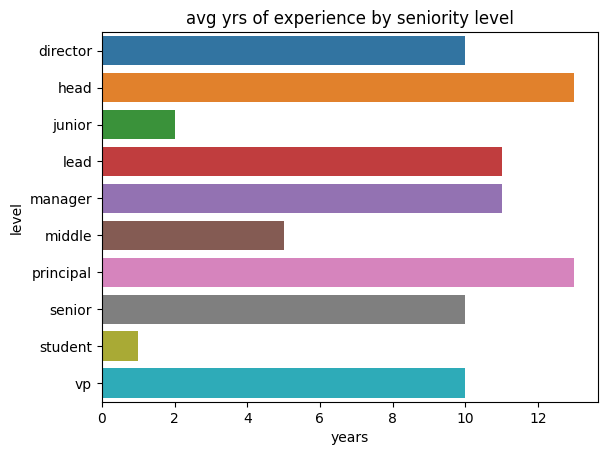

In [ ]:
from scipy.stats import iqr
level_agg = df.groupby('level').agg(median_ye=('yrs_exp','median'),IQR=('yrs_exp',iqr)).reset_index()
level_agg.drop([2], axis=0, inplace=True)
#iqr = level_agg['IQR']
sns.barplot(data=level_agg,x='median_ye',y='level')
plt.title("avg yrs of experience by seniority level")
plt.xlabel('years')
plt.ylabel('level')
plt.show()

In [ ]:
level_counts = df['level'].value_counts().nlargest(15)
top_levels = pd.DataFrame({'level': level_counts.index, 'count': level_counts.values})
fig = px.bar(top_levels, y='count', x='level')
fig.update_layout(title='Top 15 levels',
                  xaxis_title='level',
                  yaxis_title='Count')

fig.show()

In [ ]:
top_levels = df['level'].value_counts().nlargest(10).index
top_positions_data = df[df['level'].isin(top_levels)]
level_salary = top_positions_data.groupby(['year','level'])['salary'].mean().reset_index()
fig = px.line(level_salary, x='year', y='salary', color='level')
fig.update_xaxes(tickmode='array',tickvals=df['year'])
fig.update_layout(title='Salary Variation over Years - Top 10 levels',
                  xaxis_title='Year',
                  yaxis_title='Salary')
fig.show()

In [ ]:
df[df['position']=='software developer']

timestamp   age  gender        city            position  \
14    14/12/2018 13:03:34  32.0    Male     munchen  software developer   
34    14/12/2018 13:44:09  31.0    Male     munchen  software developer   
51    14/12/2018 13:54:01  32.0    Male     munchen  software developer   
61    14/12/2018 14:00:57  32.0  Female   frankfurt  software developer   
94    14/12/2018 14:35:19  25.0    Male     munchen  software developer   
102   14/12/2018 14:40:36  36.0    Male      berlin  software developer   
131   14/12/2018 15:18:07  37.0    Male      berlin  software developer   
139   14/12/2018 15:27:36  30.0    Male   frankfurt  software developer   
141   14/12/2018 15:30:27  28.0    Male     munchen  software developer   
172   14/12/2018 17:09:17  33.0    Male      berlin  software developer   
203   14/12/2018 19:04:15  22.0    Male     munchen  software developer   
231   14/12/2018 22:23:19  26.0    Male     munchen  software developer   
241   14/12/2018 23:32:06  32.0    Male      berlin  software developer   
293   15/12/2018 11:33:00  31.0    Male      berlin  software developer   
320   15/12/2018 14:24:35  25.0    Male   amsterdam  software developer   
382   16/12/2018 18:58:21  25.0    Male      berlin  software developer   
395   16/12/2018 23:03:08  36.0    Male     hamburg  software developer   
424   17/12/2018 16:14:23  35.0    Male      london  software developer   
431   17/12/2018 17:08:52  31.0    Male      berlin  software developer   
453   18/12/2018 02:42:05  26.0  Female     munchen  software developer   
476   18/12/2018 13:03:59  33.0    Male      berlin  software developer   
485   18/12/2018 14:28:00  24.0  Female     munchen  software developer   
486   18/12/2018 14:28:27  36.0    Male      berlin  software developer   
517   19/12/2018 09:46:25  35.0    Male     munchen  software developer   
518   19/12/2018 10:19:56  34.0    Male      berlin  software developer   
567   20/12/2018 09:27:44  42.0    Male   stuttgart  software developer   
600   21/12/2018 22:53:31  30.0    Male        koln  software developer   
627   23/12/2018 16:23:52  34.0    Male     hamburg  software developer   
632   24/12/2018 08:47:03  30.0    Male      vienna  software developer   
667   30/12/2018 22:14:57  30.0    Male        bonn  software developer   
668   31/12/2018 10:58:13  27.0    Male     munchen  software developer   
1925  24/11/2020 13:37:57  24.0    Male  boeblingen  software developer   
2223  25/11/2020 10:53:48  29.0  Female      berlin  software developer   
2517  27/11/2020 11:04:39  34.0    Male      berlin  software developer   

      yrs_exp   level    salary  sal_1yr_ago language comp_size  \
14         11  middle   94500.0      91300.0  russian     1000+   
34         10  senior   70000.0      60000.0  english  100-1000   
51         10  senior   78000.0      65000.0  english     10-50   
61          4  middle   65000.0      60000.0  english  100-1000   
94          3  middle   62000.0      20000.0  english  100-1000   
102        10  middle   73000.0      58000.0  english    50-100   
131        14  senior   78000.0      68000.0  english     10-50   
139         8  senior   95000.0      80000.0  english  100-1000   
141         6  middle   53000.0      48700.0  english  100-1000   
172        12  senior   75000.0      65000.0  english     1000+   
203         1  junior   70000.0      33284.0  english     1000+   
231         5  middle   68000.0      48700.0  english  100-1000   
241         8  middle   65000.0      50000.0  english  100-1000   
293        10  senior   83000.0      65000.0  english     1000+   
320         6  middle   78000.0      72500.0  english     1000+   
382         3  middle   75000.0      55000.0  english    50-100   
395        10  senior   65000.0      65000.0  english  100-1000   
424        12  senior  111000.0      95000.0  english  100-1000   
431         9  senior   70000.0      60000.0  english    50-100   
453         4  middle   47300.0      41000.0  engl

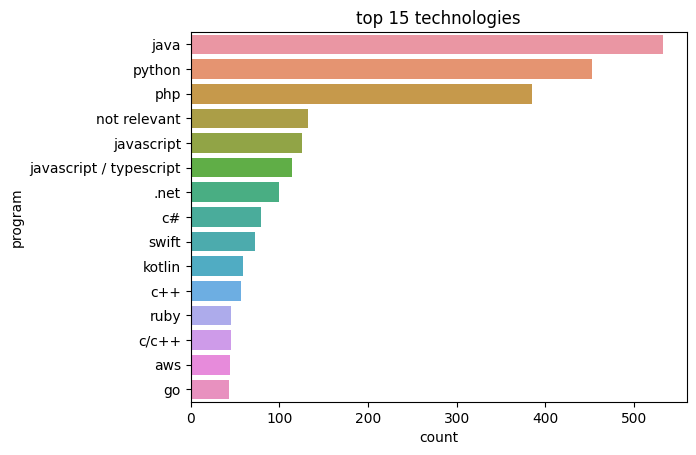

In [ ]:
program = df['technology'].value_counts().iloc[:15].reset_index()
program = program.rename(columns = {'index':'program','technology':'count'})
sns.barplot(data=program, y= 'program', x = 'count')
plt.title('top 15 technologies')
plt.show()

In [ ]:
top_technologies = df['technology'].value_counts().nlargest(10).index
top_positions_data = df[df['technology'].isin(top_technologies)]
technology_salary = top_positions_data.groupby(['year','technology'])['salary'].mean().reset_index()
fig = px.line(technology_salary, x='year', y='salary', color='technology')
fig.update_xaxes(tickmode='array',tickvals=df['year'])
fig.update_layout(title='Salary Variation over Years - Top 10 technologies',
                  xaxis_title='Year',
                  yaxis_title='Salary')

In [ ]:
df_grouped = df.groupby(['year', 'technology']).size().reset_index(name='Count')
top_technologies = df_grouped.groupby('technology')['Count'].sum().nlargest(10).index
df_top_technologies = df_grouped[df_grouped['technology'].isin(top_technologies)]
fig = px.bar(df_top_technologies, x='year', y='Count', color='technology', barmode='group')
fig.show()

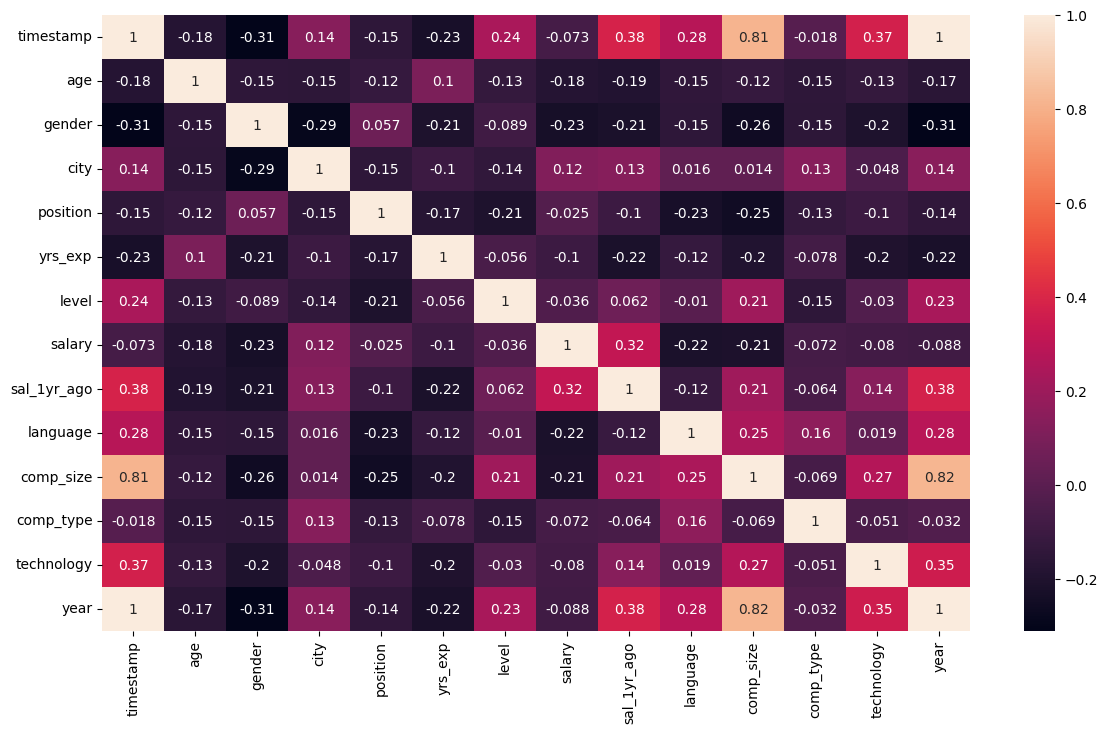

In [ ]:
co=df.apply(lambda x:pd.factorize(x)[0]).corr(method='pearson',min_periods=1)
plt.figure(figsize=(14,8))
sns.heatmap(co.corr(),annot=True)
plt.show()

# **Removing Outliers**

In [ ]:
column_name = 'salary'

# Step 2: Calculate the IQR for the column
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Define the threshold for outliers
threshold = 1.5

# Step 4: Determine the lower and upper bounds
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Step 5: Find the outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

# Output the outliers
print(outliers.count())

timestamp      192
age            192
gender         192
city           192
position       192
yrs_exp        192
level          192
salary         192
sal_1yr_ago    192
language       192
comp_size      192
comp_type      192
technology     192
year           192
dtype: int64


In [ ]:
df = df.drop(outliers.index)

In [ ]:
df['technology'].nunique()

193

In [ ]:
df['city'].nunique()

132

In [ ]:
df['comp_type'].nunique()

68

In [ ]:
df['position'].nunique()

93

In [ ]:
value_counts = df['comp_type'].value_counts()
values_to_drop = value_counts[value_counts == 1].index.tolist()
mask = df['comp_type'].isin(values_to_drop)
df = df[~mask]

In [ ]:
value_counts = df['level'].value_counts()
values_to_drop = value_counts[value_counts < 3].index.tolist()
mask = df['level'].isin(values_to_drop)
df = df[~mask]

In [ ]:
value_counts = df['city'].value_counts()
values_to_drop = value_counts[value_counts < 3].index.tolist()
mask = df['city'].isin(values_to_drop)
df = df[~mask]

In [ ]:
value_counts = df['technology'].value_counts()
values_to_drop = value_counts[value_counts < 3].index.tolist()
mask = df['technology'].isin(values_to_drop)
df = df[~mask]

In [ ]:
value_counts = df['position'].value_counts()
values_to_drop = value_counts[value_counts < 3].index.tolist()
mask = df['position'].isin(values_to_drop)
df = df[~mask]

In [ ]:
df['position'].value_counts()

In [ ]:
df.shape

(2354, 14)

In [ ]:
data = df

In [ ]:
data.shape

(2354, 14)

In [ ]:
data['technology'].nunique()

189

# **Encoding and scaling**

In [ ]:
data=data.drop('timestamp',axis=1)

In [ ]:
#data=data.drop('sal_1yr_ago',axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2948
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          2354 non-null   float64
 1   gender       2354 non-null   object 
 2   city         2354 non-null   object 
 3   position     2354 non-null   object 
 4   yrs_exp      2354 non-null   int64  
 5   level        2354 non-null   object 
 6   salary       2354 non-null   float64
 7   sal_1yr_ago  2354 non-null   float64
 8   language     2354 non-null   object 
 9   comp_size    2354 non-null   object 
 10  comp_type    2354 non-null   object 
 11  technology   2354 non-null   object 
 12  year         2354 non-null   int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 257.5+ KB


In [ ]:
y = data['salary']#dependent
x = data.drop('salary', axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
x = pd.get_dummies(x, columns = ['gender','level','language','comp_size','city','position','comp_type','technology'])
x.head()

age  yrs_exp  sal_1yr_ago  year  gender_Female  gender_Male  level_head  \
0  43.0       11      76200.0  2018              0            1           0   
1  33.0        8      55000.0  2018              1            0           0   
2  32.0       10      73000.0  2018              0            1           0   
3  25.0        6      55000.0  2018              0            1           0   
5  37.0        8      96000.0  2018              0            1           0   

   level_junior  level_lead  level_middle  level_principal  level_senior  \
0             0           0             0                0             1   
1             0           0             0                0             1   
2             0           0             0                0             1   
3             0           0             0                0             1   
5             0           0             0                0             1   

   language_deutsch  language_dutch  language_english  language_french  \
0                 1               0                 0                0   
1                 1               0                 0                0   
2                 1               0                 0                0   
3                 0               0                 1                0   
5                 1               0                 0                0   

   language_german  language_russian  language_russkii  language_spanish  \
0                0                 0                 0                 0   
1                0                 0                 0                 0   
2                0                 0                 0                 0   
3                0                 0                 0                 0   
5                0                 0                 0                 0   

   comp_size_10-50  comp_size_100-1000  comp_size_1000+  comp_size_101-1000  \
0                0                   1                0                   0   
1                0                   0                0                   0   
2                0                   0                1                   0   
3                0                   0                1                   0   
5                0                   0                1                   0   

   comp_size_11-50  comp_size_50-100  comp_size_51-100  comp_size_up to 10  \
0                0                 0                 0                   0   
1                0                 1                 0                   0   
2                0                 0                 0                   0   
3                0                 0                 0                   0   
5                0                 0                 0                   0   

   city_amsterdam  city_berlin  city_boeblingen  city_bonn  city_brussels  \
0               0            0                0          0              0   
1               0            0                0          0              0   
2               0            0                0          0              0   
3               0            0                0          0              0   
5               0            0                0          0              0   

   city_cologne  city_darmstadt  city_dresden  city_dublin  city_dusseldorf  \
0             0               0             0            0                0   
1             0               0             0            0                0   
2             0               0             0            0                0   
3             0               0             0            0                0   
5             0               0             0            0                0   

   city_eindhoven  city_frankfurt  city_hamburg  city_hannover  \
0               0               0             0              0   
1               0               0             0              0   
2               0               0             0              0   
3               0       

In [ ]:
x.shape

(2354, 181)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler() 
x = mms.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [ ]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 0.85)
 
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
 
explained_variance = pca.explained_variance_ratio_

## **linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression 
 
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
ypred_lin = reg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, ypred_lin)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 40.0%


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, ypred_lin)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 12002.735615008625


## **xgboost**

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(x_train, y_train)
predictions_xg = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, predictions_xg)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 66.0%


## **random forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 68.0%


## **decision tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
ypred_dt = dt.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, ypred_dt)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 40.0%


## **ridge and laso**

In [ ]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=0.5)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_ridge)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 56.99999999999999%


In [ ]:
lasso = Lasso(alpha=0.1)  
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_lasso)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 57.99999999999999%


# **encoding all with one hot for pca**

In [ ]:
df.shape

(2709, 13)

In [ ]:
pca_y = df['salary']#dependent
pca_X = df.drop('salary', axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
pca_X = pd.get_dummies(pca_X, columns = ['gender','level','language','comp_size','city', 'position','technology','comp_type'])
pca_X.head()

age  yrs_exp  sal_1yr_ago  year  gender_Female  gender_Male  \
0  43.0       11      76200.0  2018              0            1   
1  33.0        8      55000.0  2018              1            0   
2  32.0       10      73000.0  2018              0            1   
3  25.0        6      55000.0  2018              0            1   
4  39.0       10      60000.0  2018              0            1   

   level_director  level_head  level_intern  level_junior  level_lead  \
0               0           0             0             0           0   
1               0           0             0             0           0   
2               0           0             0             0           0   
3               0           0             0             0           0   
4               0           0             0             0           0   

   level_manager  level_middle  level_principal  level_senior  level_student  \
0              0             0                0             1              0   
1              0             0                0             1              0   
2              0             0                0             1              0   
3              0             0                0             1              0   
4              0             0                0             1              0   

   level_vp  language_czech  language_deuglisch  language_deutsch  \
0         0               0                   0                 1   
1         0               0                   0                 1   
2         0               0                   0                 1   
3         0               0                   0                 0   
4         0               0                   0                 0   

   language_dutch  language_english  language_french  language_german  \
0               0                 0                0                0   
1               0                 0                0                0   
2               0                 0                0                0   
3               0                 1                0                0   
4               0                 1                0                0   

   language_italian  language_polish  language_russian  language_russkii  \
0                 0                0                 0                 0   
1                 0                0                 0                 0   
2                 0                0                 0                 0   
3                 0                0                 0                 0   
4                 0                0                 0                 0   

   language_spanish  language_ukrainian  comp_size_10-50  comp_size_100-1000  \
0                 0                   0                0                   1   
1                 0                   0                0                   0   
2                 0                   0                0                   0   
3                 0                   0                0                   0   
4                 0                   0                0                   1   

   comp_size_1000+  comp_size_101-1000  comp_size_11-50  comp_size_50-100  \
0                0                   0                0                 0   
1                0                   0                0                 1   
2                1                   0                0                 0   
3                1                   0                0                 0   
4                0                   0                0                 0   

   comp_size_51-100  comp_size_up to 10  city_aachen  city_alicante  \
0                 0                   0            0              0   
1                 0                   0            0              0   
2                 0                   0            0              0   
3                 0                   0            0              0   
4                 0                   0            0              0   


In [ ]:
from sklearn.model_selection import train_test_split
 
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_X, pca_y, test_size = 0.2, random_state = 42)

In [ ]:
sc = MinMaxScaler()
 
pca_X_train = sc.fit_transform(pca_X_train)
pca_X_test = sc.transform(pca_X_test)

In [ ]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = .85)
 
pca_X_train = pca.fit_transform(pca_X_train)
pca_X_test = pca.transform(pca_X_test)
 
explained_variance = pca.explained_variance_ratio_

In [ ]:
from sklearn.linear_model import LinearRegression 
 
reg = LinearRegression()
reg.fit(pca_X_train, pca_y_train)

LinearRegression()

In [ ]:
pca_predict = reg.predict(pca_X_test)

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(pca_y_test, pca_predict)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 39.0%


## **XGBOOST**

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(pca_X_train, pca_y_train)
predictions_2 = model.predict(pca_X_test)

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(pca_y_test, predictions_2)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 36.0%


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, criterion="squared_error",
                           bootstrap=True, oob_score=True, n_jobs=2,
                           random_state=42)

# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':[None,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'max_features':['auto','sqrt','log2']}

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(rf, param_grid=hyperparameter_space , 
                  scoring="neg_mean_squared_error",
                  n_jobs=2, cv=5, return_train_score=True)

gs.fit(pca_X_train, pca_y_train)
print("Optimal hyperparameter combination: ", gs.best_params_)
print("Mean cross-validated MSE or training score of the best_estimator: ",
       np.sqrt(-gs.best_score_))
gs.best_estimator_.fit(pca_X_train, pca_y_train)
y_pred_rf_pca = gs.best_estimator_.predict(pca_X_test)

In [ ]:
diff = y_test1 - y_pred1

NameError: ignored

In [ ]:
def plot_rel(actual, pred):
    plt.scatter(actual, pred, label='Data Points')
    
    #fitting line
    #x_range = np.linspace(np.min(actual), np.max(actual), 100)
    #y_range = model.predict(x_range.reshape(-1,1))
    #plt.plot(x_range, y_range.reshape(-1) , color='red', label='Fitting line')
    
    plt.xlabel('Actual values')
    plt.ylabel('Predicted Value')
    plt.title("Actual values vs Predicted value ")
    plt.show()
plot_rel(y_test1 , y_pred1)

In [ ]:
plt.scatter(predictions_2, diff)
plt.axhline(y=0, color='r', linestyle='--')
#plt.plot(X_train1, reg.predict(X_train1), color='red')
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residual (diff)')
plt.show()

# **Encoding with label and onehot**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
X['comp_type'].nunique()   

73

In [ ]:
columns_to_encode = ['city', 'position','technology','comp_type']

In [ ]:
encoder = LabelEncoder()
for column in columns_to_encode:
    X[column] = encoder.fit_transform(X[column])

In [ ]:
X.head()

age  gender  city  position  yrs_exp   level  sal_1yr_ago language  \
0  43.0    Male   101        82       11  senior      76200.0  deutsch   
1  33.0  Female   101        59        8  senior      55000.0  deutsch   
2  32.0    Male   101        82       10  senior      73000.0  deutsch   
3  25.0    Male   101        33        6  senior      55000.0  english   
4  39.0    Male   101        94       10  senior      60000.0  english   

  comp_size  comp_type  technology  year  
0  100-1000         53         127  2018  
1    50-100         53         127  2018  
2     1000+         53         127  2018  
3     1000+         53          83  2018  
4  100-1000         18         119  2018

In [ ]:
from sklearn.preprocessing import OneHotEncoder
X = pd.get_dummies(X, columns = ['gender','level','language','comp_size'])
X.head()

age  city  position  yrs_exp  sal_1yr_ago  comp_type  technology  year  \
0  43.0   101        82       11      76200.0         53         127  2018   
1  33.0   101        59        8      55000.0         53         127  2018   
2  32.0   101        82       10      73000.0         53         127  2018   
3  25.0   101        33        6      55000.0         53          83  2018   
4  39.0   101        94       10      60000.0         18         119  2018   

   gender_Female  gender_Male  level_director  level_head  level_intern  \
0              0            1               0           0             0   
1              1            0               0           0             0   
2              0            1               0           0             0   
3              0            1               0           0             0   
4              0            1               0           0             0   

   level_junior  level_lead  level_manager  level_middle  level_principal  \
0             0           0              0             0                0   
1             0           0              0             0                0   
2             0           0              0             0                0   
3             0           0              0             0                0   
4             0           0              0             0                0   

   level_senior  level_student  level_vp  language_czech  language_deuglisch  \
0             1              0         0               0                   0   
1             1              0         0               0                   0   
2             1              0         0               0                   0   
3             1              0         0               0                   0   
4             1              0         0               0                   0   

   language_deutsch  language_dutch  language_english  language_french  \
0                 1               0                 0                0   
1                 1               0                 0                0   
2                 1               0                 0                0   
3                 0               0                 1                0   
4                 0               0                 1                0   

   language_german  language_italian  language_polish  language_russian  \
0                0                 0                0                 0   
1                0                 0                0                 0   
2                0                 0                0                 0   
3                0                 0                0                 0   
4                0                 0                0                 0   

   language_russkii  language_spanish  language_ukrainian  comp_size_10-50  \
0                 0                 0                   0                0   
1                 0                 0                   0                0   
2                 0                 0                   0                0   
3                 0                 0                   0                0   
4                 0                 0                   0                0   

   comp_size_100-1000  comp_size_1000+  comp_size_101-1000  comp_size_11-50  \
0                   1                0                   0                0   
1                   0                0                   0                0   
2                   0                1                   0                0   
3                   0                1                   0                0   
4                   1                0                   0                0   

   comp_size_50-100  comp_size_51-100  comp_size_up to 10  
0                 0                 0                   0  
1                 1                 0                   0  
2                 0                 0                   0  
3                 0                 0                   0  


In [ ]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True,test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 5)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [ ]:
from sklearn.linear_model import LinearRegression 
 
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is -4.3046754007142105e+26%


In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(x_train, y_train)
predictions_xg = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, predictions_xg)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 36.0%


without pca and random state = 42, test size =0.3 we get 67%

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, criterion="squared_error",
                           bootstrap=True, oob_score=True, n_jobs=2,
                           random_state=42)

# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':[None,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'max_features':['auto','sqrt','log2']}

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(rf, param_grid=hyperparameter_space , 
                  scoring="neg_mean_squared_error",
                  n_jobs=2, cv=5, return_train_score=True)

gs.fit(x_train, y_train)
print("Optimal hyperparameter combination: ", gs.best_params_)
print("Mean cross-validated MSE or training score of the best_estimator: ",
       np.sqrt(-gs.best_score_))
gs.best_estimator_.fit(x_train, y_train)
y_pred_rf = gs.best_estimator_.predict(x_test)

from sklearn.metrics import mean_squared_error as MSE
rmse_test = np.sqrt(MSE(y_test, y_pred_rf))
print("Test score: ", np.round(rmse_test, 2))

Optimal hyperparameter combination:  {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2}
Mean cross-validated MSE or training score of the best_estimator:  9185.336487796114
Test score:  9527.74


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_rf)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 60.0%


with pca for random forest the accuracy is 39

In [ ]:
def plot_rel(actual, pred):
    plt.scatter(actual, pred, label='Data Points')
    
    #fitting line
    #x_range = np.linspace(np.min(actual), np.max(actual), 100)
    #y_range = model.predict(x_range.reshape(-1,1))
    #plt.plot(x_range, y_range.reshape(-1) , color='red', label='Fitting line')
    
    plt.xlabel('Actual values')
    plt.ylabel('Predicted Value')
    plt.title("Actual values vs Predicted value ")
    plt.show()

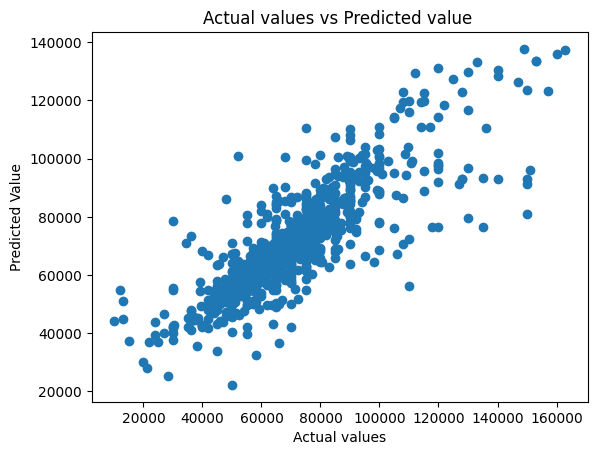

In [ ]:
plot_rel(y_test , y_pred_rf)

In [ ]:
diff = y_test - y_pred_rf

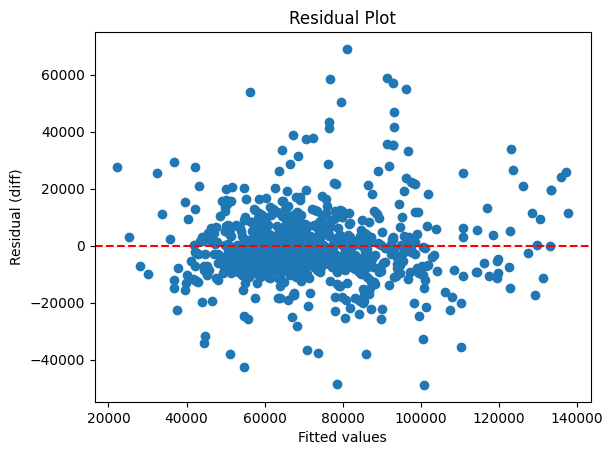

In [ ]:
#Residual plot
plt.scatter(y_pred_rf, diff)
plt.axhline(y=0, color='r', linestyle='--')
#plt.plot(X_train1, reg.predict(X_train1), color='red')
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residual (diff)')
plt.show()